# **1. Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# **2. Load Dataset**

In [3]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/filasofiya19/Projek-Analisis-Data-dengan-Neural-Network-online-shoppers-intention-dengan-Deep-Neural-Network-/main/online_shoppers_intention.csv')
print(data)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

# **3. Data Understanding**

**Online Shoppers Purchasing Intention Dataset**

*Tentang Dataset*

Dataset ini mencakup 18 fitur dari 12.330 sampel.
Setiap sesi mewakili pengguna yang berbeda selama periode 1 tahun untuk menghindari bias terkait kampanye tertentu, hari istimewa, profil pengguna, atau periode waktu.


Dataset ini terdiri dari 10 fitur numerik dan 8 fitur kategorikal.

Fitur 'Revenue' merupakan label kelas.

```
| Fitur                   | Deskripsi                                                                                                                                                                   |
|-------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Administrative          | Jumlah halaman administratif yang dikunjungi selama sesi.                                                                                                                 |
| Administrative_Duration | Total waktu yang dihabiskan di halaman administratif selama sesi.                                                                                                           |
| Informational           | Jumlah halaman informasi yang dikunjungi selama sesi.                                                                                                                     |
| Informational_Duration  | Total waktu yang dihabiskan di halaman informasi selama sesi.                                                                                                               |
| ProductRelated          | Jumlah halaman terkait produk yang dikunjungi selama sesi.                                                                                                                 |
| ProductRelated_Duration | Total waktu yang dihabiskan di halaman terkait produk selama sesi.                                                                                                          |
| BounceRates             | Persentase pengunjung yang meninggalkan situs setelah hanya melihat satu halaman.                                                                                           |
| ExitRates               | Persentase tampilan halaman yang merupakan halaman terakhir dalam sesi.                                                                                                     |
| PageValues              | Nilai rata-rata untuk halaman yang dikunjungi sebelum menyelesaikan transaksi e-commerce.                                                                                  |
| SpecialDay              | Menunjukkan seberapa dekat tanggal kunjungan dengan hari istimewa tertentu, dengan nilai maksimum mendekati hari istimewa.                                                   |
| Month                   | Bulan dalam setahun ketika kunjungan terjadi.                                                                                                                               |
| OperatingSystems        | Sistem operasi yang digunakan oleh pengunjung (misalnya Windows, Mac, Linux).                                                                                               |
| Browser                 | Browser yang digunakan oleh pengunjung (misalnya Chrome, Firefox, Safari).                                                                                                  |
| Region                  | Wilayah geografis tempat pengunjung berasal.                                                                                                                                |
| TrafficType             | Jenis trafik yang mengarah ke situs (misalnya organik, referral, direct).                                                                                                    |
| VisitorType             | Tipe pengunjung (Returning_Visitor atau New_Visitor).                                                                                                                        |
| Weekend                 | Menunjukkan apakah kunjungan terjadi pada akhir pekan atau pada hari biasa.                                                                                                 |
| Revenue                 | Label kelas yang menunjukkan apakah transaksi terjadi selama sesi (True atau False).                                                                                       |

```


## **3.1 Cek Tipe Data**

In [4]:
# Cek Tipe Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Dataset ini memiliki 2 tipe data bollean, 7 tipe data float, 7 tipe data integer, 2 tipe data object.

## **3.2 Cek Dimensi Data**

In [5]:
# Cek dimensi data
data.shape

(12330, 18)

( data memiliki 12330 records (baris) dan 18 feature(kolom))

In [6]:
# Cek 5 data teratas
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [7]:
#Cek 5 data terbawah
data.tail()

Administrative  Administrative_Duration  Informational  \
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False

## **3.3 Pengelompokan Tipe Data**

Pengelompokan Tipe Data :

Month, OperatingSystems, Browser, Region, TrafficType, visitor type, Weekend, Revenue adalah data kategorik. Dengan OperatingSystems, Browser, Region, TrafficType pada data sudah di encoding, untuk data visitor type, Weekend, Revenue nanti akan dilakuakn data transformation dan kita perlu encoding .

Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay adalah Data Numerik.

Revenue: Variabel target atau label yang menunjukkan apakah pembeli berbelanja online atau tidak. Label ini bernilai (True) untuk pembeli yang berbelanja online dan (False) untuk pembeli yang tidak berbelanja online.
Revenue akan dilakukam data transformation jadi akan di encoding dengan true = 1 dan false = 0.

In [8]:
# membagi feature berdasarkan value numerik dan kategori

cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
nums = ['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

## **3.4 Cek Missing Value**

In [9]:
# Cek Missing Value
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada missing value dalam data ini, sehingga tidak dilakukan handling missing value.

## **3.5 Cek Data Duplicate**

In [10]:
# cek duplikat
data.duplicated().any()

True

In [11]:
data.duplicated().sum()

125

Terdapat 125 baris yang duplikat

## **3.6 Deskripsi Fitur Target**

In [12]:
# melihat nilai revenue yang True dan False
revenue_col = data['Revenue'].value_counts().reset_index()
revenue_col.columns = ['Revenue', 'count']
revenue_col['%'] = (revenue_col['count']/revenue_col['count'].sum()*100).round(2)
revenue_col

Revenue  count      %
0    False  10422  84.53
1     True   1908  15.47

Dari revenue (total transaksi), hanya 1908 transaksi yang berhasil dan menghasilkan pembeli.

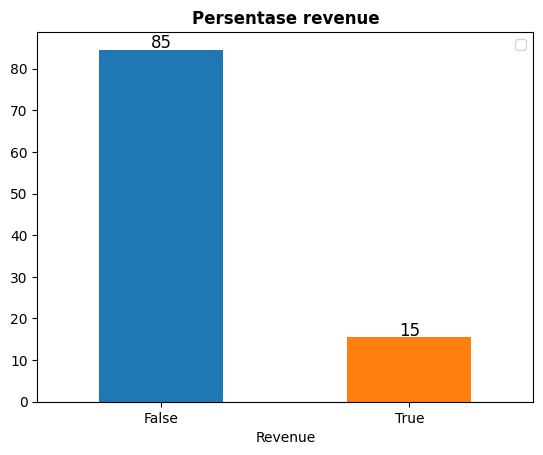

In [13]:
#   Visulisasi Revenue
x = revenue_col.plot(kind='bar', x='Revenue', y='%', color=sns.color_palette('tab10'))
plt.title('Persentase revenue', fontweight='bold')
plt.xticks(rotation=360)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)
plt.legend('')

## **3.7 Statistika Deskriptif Data**

In [14]:
# Statistika Deskripstif
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

# **4. Data Preparation**

## **4.1 Mengatasi Data Duplikat**

In [15]:
data[data.duplicated(keep=False) == True]

Administrative  Administrative_Duration  Informational  \
85                  0                      0.0              0   
132                 0                      0.0              0   
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
85                        0.0               1                      0.0   
132                       0.0               1                      0.0   
158                       0.0               1                      0.0   
159                       0.0               1                      0.0   
178                       0.0               1                      0.0   
...                       ...             ...                      ...   
11934                     0.0               1                      0.0   
11938                     0.0               1                      0.0   
12159                     0.0               1                      0.0   
12180                     0.0               1                      0.0   
12185                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
85             0.2        0.2         0.0         0.0   Feb                 1   
132            0.2        0.2         0.0         0.0   Feb                 3   
158            0.2        0.2         0.0         0.0   Feb                 1   
159            0.2        0.2         0.0         0.0   Feb                 3   
178            0.2        0.2         0.0         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
11934          0.2        0.2         0.0         0.0   Dec                 1   
11938          0.2        0.2         0.0         0.0   Dec                 1   
12159          0.2        0.2         0.0         0.0   Dec                 1   
12180          0.2        0.2         0.0         0.0   Dec                 1   
12185          0.2        0.2         0.0         0.0   Dec                 8   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
85           1       1            3  Returning_Visitor    False    False  
132          2       3            3  Returning_Visitor    False    False  
158          1       1            3  Returning_Visitor    False    False  
159          2       3            3  Returning_Visitor    False    False  
178          2       3            3  Returning_Visitor    False    False  
...        ...     ...          ...                ...      ...      ...  
11934        1       1            2        New_Visitor    False    False  
11938        1       4            1  Returning_Visitor     True    False  
12159        1       1            3  Returning_Visitor    False    False  
12180       13       9           20  Returning_Visitor    False    False  
12185       13       9           20              Other    False    False  

[201 rows x 18 columns]

In [16]:
# menghapus duplikat
print(f'Jumlah Baris yang Duplikat SEBELUM dihapus {data.duplicated().sum()}')
data.drop_duplicates(inplace=True)
print(f'Jumlah Baris yang Duplikat SETELAH dihapus {data.duplicated().sum()}')

Jumlah Baris yang Duplikat SEBELUM dihapus 125
Jumlah Baris yang Duplikat SETELAH dihapus 0


In [17]:
# inisiasi update datadrame

data = data.drop_duplicates().reset_index(drop = True)

In [18]:
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [19]:
# melihat nilai unique disetiap feature
for col in data.columns:
    print('{} mempunyai {} nilai unique : {}'.format(col, data[col].nunique(), data[col].dtypes))
    if data[col].dtypes == 'int64' or data[col].dtypes == 'float64' or data[col].dtypes == 'bool' or data[col].dtypes == 'object':
        print('{} nilai : {}'.format(col,data[col].unique()))

Administrative mempunyai 27 nilai unique : int64
Administrative nilai : [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration mempunyai 3335 nilai unique : float64
Administrative_Duration nilai : [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational mempunyai 17 nilai unique : int64
Informational nilai : [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration mempunyai 1258 nilai unique : float64
Informational_Duration nilai : [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated mempunyai 311 nilai unique : int64
ProductRelated nilai : [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  5

* Terdapat 2 bulan yang hilang yaitu Januari dan April.
* Nilai Other pada VisitorType.
* Fitur kategorikal seperti OperatingSystems, Browser, Region, TrafficTipe telah dilakukan encoding.

## **4.2 Statistika Deskriptif Data Setelah Data Duplikat Dihilangkan**

In [20]:
# Statistika Deskripstif
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        8.000000               193.000000   
50%                  0.000000       18.000000               608.942857   
75%                  0.000000       38.000000              1477.154762   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12205.000000  12205.000000  12205.000000  12205.000000   
mean       0.020370      0.041466      5.949574      0.061942   
std        0.045255      0.046163     18.653671      0.199666   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014231      0.000000      0.000000   
50%        0.002899      0.025000      0.000000      0.000000   
75%        0.016667      0.048529      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12205.000000  12205.000000  12205.000000  12205.000000  
mean           2.124211      2.357804      3.153298      4.073904  
std            0.906823      1.710114      2.402340      4.016654  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

* Mayoritas dataset memiliki angka **Mean < Median**, artinya distribusi data cenderung positively-skewed.
* Pada fitur yang menunjukkan **traffic website** seperti 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', dan 'PageValues **mayoritas memiliki nilai yang menumpuk di angka 0.**

In [21]:
# melihat deskriptif statistik kolom kategorik
data_cat = data[['Month', 'VisitorType', 'Weekend', 'Revenue', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object').describe().T
data_cat['% freq'] = (data_cat['freq']/data_cat['count']*100)
data_cat

count unique                top   freq     % freq
Month             12205     10                May   3329  27.275707
VisitorType       12205      3  Returning_Visitor  10431  85.464973
Weekend           12205      2              False   9346  76.575174
Revenue           12205      2              False  10297  84.367063
OperatingSystems  12205      8                  2   6541   53.59279
Browser           12205     13                  2   7883  64.588283
Region            12205      9                  1   4714  38.623515
TrafficType       12205     20                  2   3911  32.044244

* Jumlah pengunjung web tertinggi ada pada bulan Mei.
* Mayoritas 85% pelanggan adalah Returning Visitor.
* Sebanyak 84% pengunjung website tidak purchase.
* Mayoritas pelanggan berasal dari Region 1 dan berselancar di website menggunakan OperatingSystems, Browser, TraficType jenis 2.

## **4.3 Cek Outlier Data**

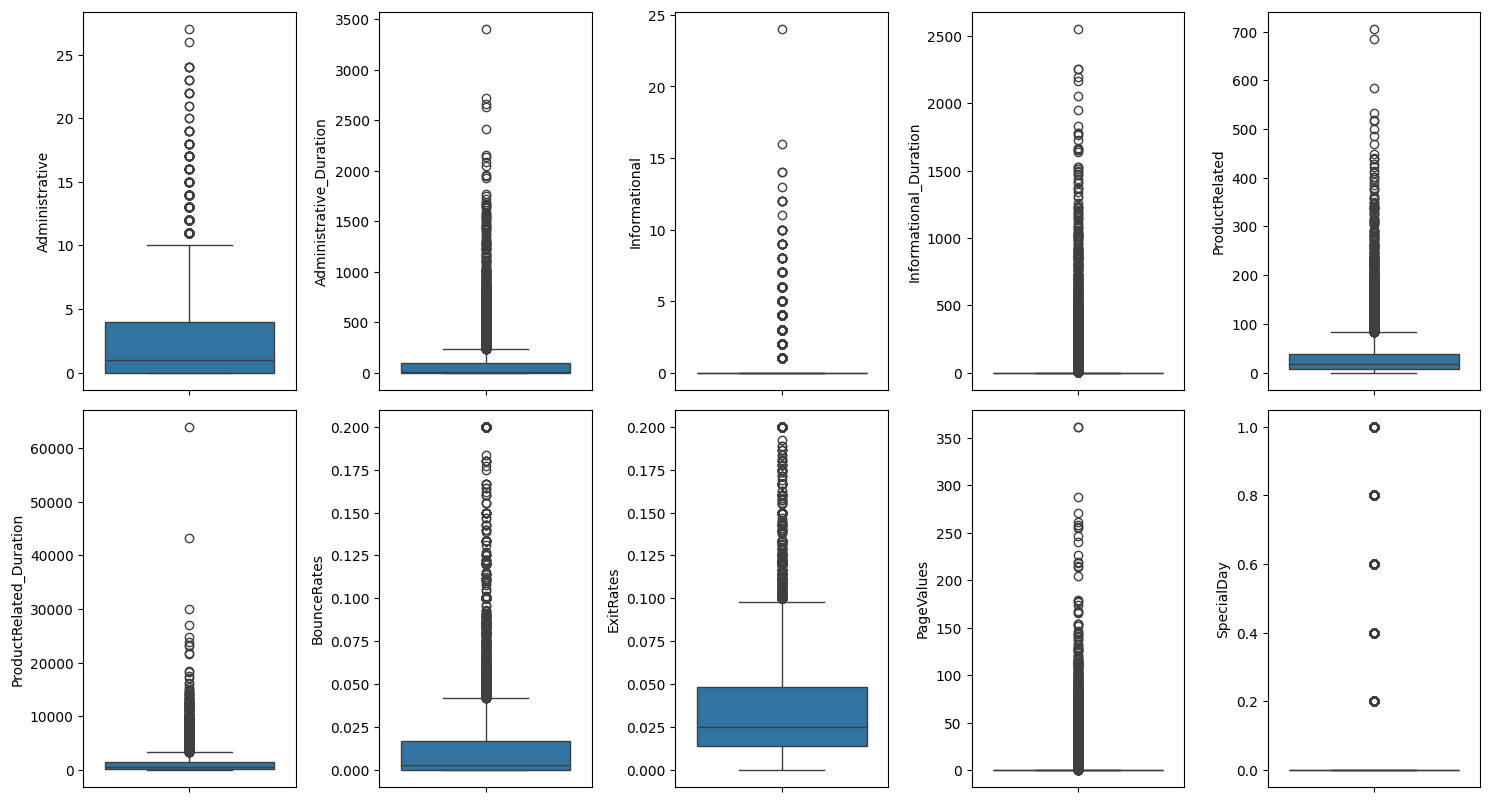

In [22]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(15, 20))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=data[nums[i]], orient='v')
    plt.tight_layout()

In [23]:
#Cek outlier data
filtered_entries = np.array([True] * len(data))

print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

for col in nums:
    zscore = abs(stats.zscore(data[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

data1 = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')
print(f'Persentase outlier: {round((len(data)-len(data1))/len(data)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Persentase outlier: 17.9%


Presentase outlier dalam data 17.90%, nilai tersebut cukup besar, maka outlier tidak dihilangkan. Tidak dilakukan handle juga karena outlier ini bukan dari kesalahan dalam pengambilan data.

## **4.4 Data Transformation**

Transformasi feature tidak menggunakan log karena data memiliki banyak value dengan nilai 0. PowerTransformer Yeo-Johnson dipilih untuk membuat distribusi lebih mendekati normal (Guassian) dan mendukung value data memiliki nilai positif atau negatif.

In [24]:
# transformasi data
for x in nums:
    pt = PowerTransformer(method='yeo-johnson')
    data[x] = pt.fit_transform(data[x].to_frame())

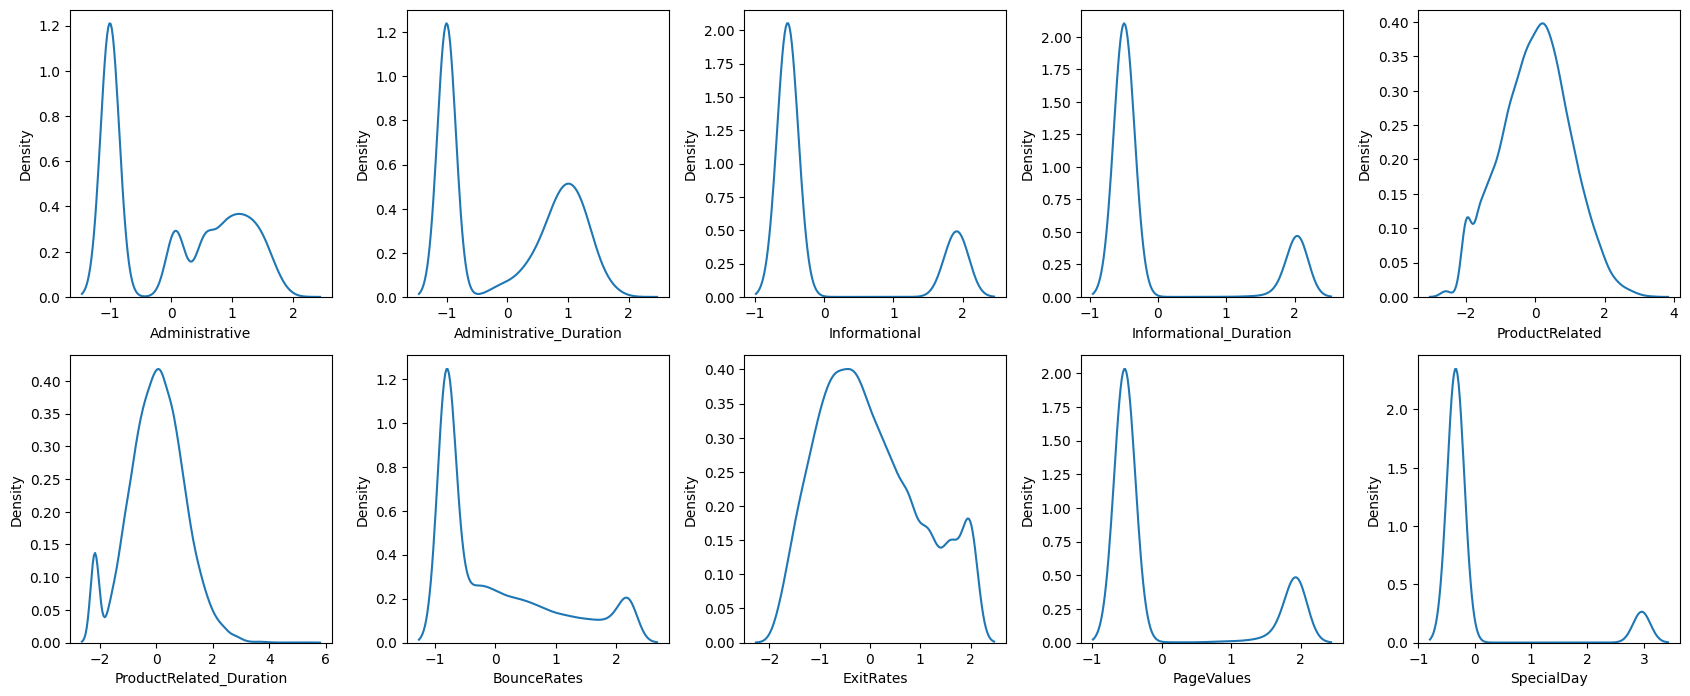

In [25]:
# cek distribusi data

features = nums
plt.figure(figsize=(17, 17))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=data[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

## 4.5 Feature Encoding

### 4.5.1 Encoding Fitur Visitor Type

In [26]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

Disini Other akan dianggap sebagai returning visitor (modus), akan dilakukan one hot encoding dimana Returning Visitor : 1, dan New Vistor : 0.

In [27]:
data['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

In [28]:
data['VisitorType'] = data['VisitorType'].map({'New_Visitor': 0, 'Returning_Visitor': 1})

### **4.5.2 Encoding Fitur Revenue**

In [29]:
data['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

Disini akan dilakukan one hot encoding, Dengan True: 1, dan False : 0.

In [30]:
data['Revenue'] = data['Revenue'].map({False: 0, True: 1})

### **4.5.3 Encoding Fitur Weekend**

In [31]:
data['Weekend'].value_counts()

Weekend
False    9346
True     2859
Name: count, dtype: int64

Disini akan dilakukan one hot encoding, Dengan True: 1, dan False : 0.

In [32]:
data['Weekend'] = data['Weekend'].map({False: 0, True: 1})

### **4.5.4 Encoding Fitur Month**

In [33]:
data['Month'].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

Fitur Month akan dilakukan label encoding, sesuai index dari bulan paling banyak

In [34]:
# Menghitung jumlah kemunculan setiap bulan
month_counts = data['Month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']

# Membuat urutan angka untuk setiap bulan berdasarkan peringkat frekuensi
month_counts['Month_Index'] = month_counts['Count'].rank(ascending=False).astype(int)

# Menampilkan hasil peringkat bulan
print("Peringkat bulan berdasarkan frekuensi:")
print(month_counts)

# Membuat dictionary untuk mapping bulan ke angka
mapping_month = month_counts.set_index('Month')['Month_Index'].to_dict()

# Menampilkan dictionary mapping
print("Mapping bulan ke angka:")
print(mapping_month)

# Mengonversi kolom 'Month' menjadi angka menggunakan mapping
data['Month'] = data['Month'].map(mapping_month)

Peringkat bulan berdasarkan frekuensi:
  Month  Count  Month_Index
0   May   3329            1
1   Nov   2982            2
2   Mar   1860            3
3   Dec   1706            4
4   Oct    549            5
5   Sep    448            6
6   Aug    433            7
7   Jul    432            8
8  June    285            9
9   Feb    181           10
Mapping bulan ke angka:
{'May': 1, 'Nov': 2, 'Mar': 3, 'Dec': 4, 'Oct': 5, 'Sep': 6, 'Aug': 7, 'Jul': 8, 'June': 9, 'Feb': 10}


**Melihat Sample Data setelah dilakukan Encoding**

In [35]:
data.sample(5)

Administrative  Administrative_Duration  Informational  \
8281        -0.998474                -1.005468      -0.523851   
9092         0.834177                 0.691681      -0.523851   
2018        -0.998474                -1.005468      -0.523851   
10867       -0.998474                -1.005468       1.807721   
10776        1.171179                 1.290641      -0.523851   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
8281                -0.494799        0.309362                 0.323600   
9092                -0.494799        0.992655                 1.947720   
2018                -0.494799       -1.007465                -1.321258   
10867                2.033464        2.732505                 2.394185   
10776               -0.494799       -0.316462                 0.706921   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
8281     -0.802948  -0.241701    1.954765    -0.33763      2   
9092     -0.415908  -1.004383    1.974870    -0.33763      2   
2018      2.209050   1.941751   -0.532801    -0.33763      3   
10867    -0.610252  -1.230481    1.898881    -0.33763      2   
10776    -0.395957  -0.081143    1.973952    -0.33763      4   

       OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  \
8281                  2        2       3           11            1        0   
9092                  2        6       1            3            1        0   
2018                  3        2       3            1            1        0   
10867                 2        2       1            2            1        0   
10776                 2        2       1            8            1        0   

       Revenue  
8281         1  
9092         1  
2018         0  
10867        1  
10776        0

**Melihat Tipe Data setelah dilakukan Encoding**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

# **5. Analisis Univariat dan Visualisasi Data**

## **5.1 Analisis Univariat Visitor Type dengan Revenue dan Visulisasinya**

In [37]:
data['VisitorType'] = data['VisitorType']
# Menghitung statistik yang diperlukan
v = data.groupby(['VisitorType', 'Revenue'])['VisitorType'].count().reset_index(name='count')
v['percentage'] =  (100 * v['count'] / v.groupby('VisitorType')['count'].transform('sum')).round(2)

# Membuat pivot table
pvt = v.pivot_table(index='VisitorType', columns='Revenue', values=['count', 'percentage'])

# Membuat dictionary untuk mapping bilangan bulan ke nama bulan
v_mapping_reverse = {0:'New_Visitor', 1:'Returning_Visitor'}

# Mengganti nama indeks dengan nama bulan yang sesuai
pvt.index = pvt.index.map(v_mapping_reverse)
# Menampilkan hasil
pvt

count         percentage       
Revenue                 0       1          0      1
VisitorType                                        
New_Visitor        1271.0   422.0      75.07  24.93
Returning_Visitor  9026.0  1486.0      85.86  14.14

[Text(0, 0, 'New Visitor'), Text(0, 1, 'Returning Visitor')]

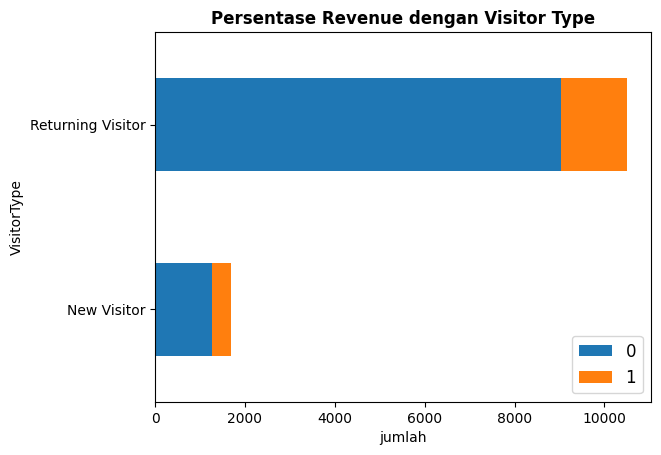

In [38]:
pvt_count = v.pivot_table(index='VisitorType', columns='Revenue', values='count')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Persentase Revenue dengan Visitor Type', fontweight='bold')
plt.xticks(rotation=360)
plt.xlabel('jumlah')
plt.legend(loc='lower right', fontsize=12)
y_labels = ['New Visitor', 'Returning Visitor']  # Replace with your desired labels
ax.set_yticklabels(y_labels)

Dapat dilihat bahwa pada setahun terakhir jumlah kunjungan dan revenue pengunjung dari new visitor memiliki perbandingan yang cukup rendah di banding dengan returning visitor.

## **5.2 Analisis Univariat Month dengan Revenue dan Visualisasinya**

In [39]:
data['Month'] = data['Month']
# Menghitung statistik yang diperlukan
m = data.groupby(['Month', 'Revenue'])['Month'].count().reset_index(name='jumlah')
m['persentase'] =  (100 * m['jumlah'] / m.groupby('Month')['jumlah'].transform('sum')).round(2)

# Membuat pivot table
pvt = m.pivot_table(index='Month', columns='Revenue', values=['jumlah', 'persentase'])

# Membuat dictionary untuk mapping bilangan bulan ke nama bulan
month_mapping_reverse = {10:'Feb', 3:'Mar', 1: 'May', 9:'June', 8:'Jul',7:'Aug', 6:'Sep', 5:'Oct',2:'Nov',4:'Dec'}  # Sesuaikan dengan kebutuhan Anda

# Mengganti nama indeks dengan nama bulan yang sesuai
pvt.index = pvt.index.map(month_mapping_reverse)
# Menampilkan hasil
pvt


jumlah        persentase       
Revenue       0      1          0      1
Month                                   
May      2964.0  365.0      89.04  10.96
Nov      2222.0  760.0      74.51  25.49
Mar      1668.0  192.0      89.68  10.32
Dec      1490.0  216.0      87.34  12.66
Oct       434.0  115.0      79.05  20.95
Sep       362.0   86.0      80.80  19.20
Aug       357.0   76.0      82.45  17.55
Jul       366.0   66.0      84.72  15.28
June      256.0   29.0      89.82  10.18
Feb       178.0    3.0      98.34   1.66

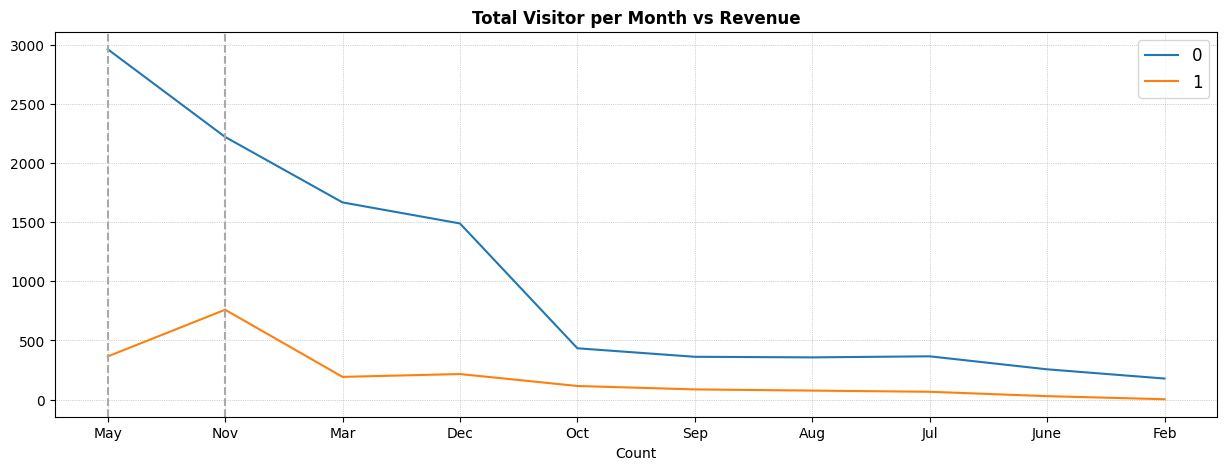

In [40]:
pvt_count = m.pivot_table(index='Month', columns='Revenue', values='jumlah')
val =['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb']

ax = pvt_count.plot(kind='line', figsize=(15,5))
plt.title('Total Visitor per Month vs Revenue', fontweight='bold')

# plt.xticks(rotation=360)
plt.xlabel('Count')
plt.legend(loc='lower right', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)

ax.set_xticks(np.arange(len(pvt_count)) + 1)
ax.set_xticklabels(val)

plt.axvline(x=1, color='darkgrey', ls='--', lw=1.5)
plt.axvline(x=2, color='darkgrey', ls='--', lw=1.5)


Dapat dilihat bahwa trafik jumlah kunjungan pelanggan setiap bulan memiliki jumlah yang paling tinggi pada bulan Mei dan di susul pada bulan November. Namun pada bulan Mei tingginya trafik tidak diikuti dengan tingginya angka Revenue yang hanya menghasilkan 11%. Sedangkan pada bulan November merupakan bulan yang memiliki cukup banyak pengunjung dengan nilai Revenue bulanan yang paling tinggi, yaitu mencapai 25%.

## **5.3 Analisis Univariat Region dengan Revenue dan Visualisasinya**

In [41]:
reg = data.copy()
reg = reg.groupby(['Region', 'Revenue'])['Region'].count()
reg = reg.reset_index(name='jumlah')
reg['persentase'] =  (100 * reg['jumlah'] / reg.groupby('Region')['jumlah'].transform('sum')).round(2)

pvt = reg.pivot_table(index='Region', columns='Revenue', values=['jumlah', 'persentase'])
pvt

jumlah        persentase       
Revenue       0      1          0      1
Region                                  
1        3943.0  771.0      83.64  16.36
2         940.0  188.0      83.33  16.67
3        2030.0  349.0      85.33  14.67
4         996.0  175.0      85.06  14.94
5         266.0   52.0      83.65  16.35
6         689.0  112.0      86.02  13.98
7         639.0  119.0      84.30  15.70
8         375.0   56.0      87.01  12.99
9         419.0   86.0      82.97  17.03

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

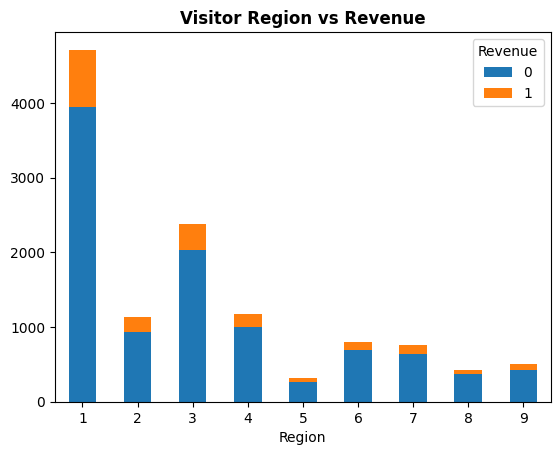

In [42]:
pvt_count = reg.pivot_table(index='Region', columns='Revenue', values='jumlah')

ax = pvt_count.plot(kind='bar', stacked=True)
plt.title('Visitor Region vs Revenue', fontweight='bold')
plt.xticks(rotation=360)

Kunjungan pelanggan didominasi pada region "1" dengan Revenue Rate yang cukup tinggi.

## **5.4 Analisis Univariat Weekend dengan Revenue**

In [43]:
w = data.copy()
w = w.groupby(['Weekend', 'Revenue'])['Region'].count()
w = w.reset_index(name='jumlah')
w['persentase'] =  (100 * w['jumlah'] / w.groupby('Weekend')['jumlah'].transform('sum')).round(2)

pvt = w.pivot_table(index='Weekend', columns='Revenue', values=['jumlah', 'persentase'])
pvt

jumlah         persentase       
Revenue       0       1          0      1
Weekend                                  
0        7937.0  1409.0      84.92  15.08
1        2360.0   499.0      82.55  17.45

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

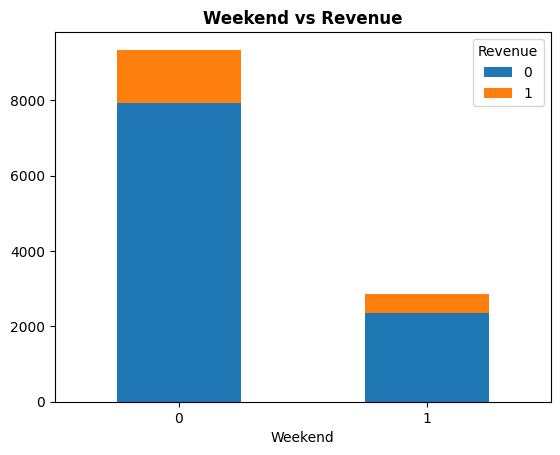

In [44]:
pvt_count = w.pivot_table(index='Weekend', columns='Revenue', values='jumlah')

ax = pvt_count.plot(kind='bar', stacked=True)
plt.title('Weekend vs Revenue', fontweight='bold')
plt.xticks(rotation=360)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

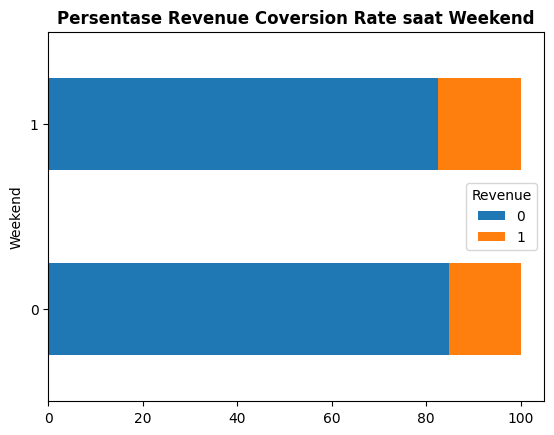

In [45]:
pvt_count = w.pivot_table(index='Weekend', columns='Revenue', values='persentase')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Persentase Revenue Coversion Rate saat Weekend', fontweight='bold')
plt.xticks(rotation=360)

Pada dasarnya presentase kunjungan  Weekend dan Weekday tidak terlalu berbeda signifikan. Namun Weekday memiliki nilai yang lebih tinggi. Namun hal ini bisa terjadi dikarenakan memang jumlah hari di Weekday lebih banyak daripada Weekend atau memang pengunjung memang lebih sering mengunjungi website di hari-hari weekday.

# **6. Analisis Multivariat dan Visualisasinya**

## **6.1 Hubungan Antar Fitur Numerikal**

In [46]:
# numerikal dengan target
nums_dan_revenue = data[nums]
nums_dan_revenue['Revenue'] = data['Revenue']
nums_dan_revenue.T

<ipython-input-46-475ec5c6ed42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nums_dan_revenue['Revenue'] = data['Revenue']


0         1         2         3         4      \
Administrative          -0.998474 -0.998474 -0.998474 -0.998474 -0.998474   
Administrative_Duration -1.005468 -1.005468 -1.005468 -1.005468 -1.005468   
Informational           -0.523851 -0.523851 -0.523851 -0.523851 -0.523851   
Informational_Duration  -0.494799 -0.494799 -0.494799 -0.494799 -0.494799   
ProductRelated          -1.976591 -1.620640 -1.976591 -1.620640 -0.466390   
ProductRelated_Duration -2.168082 -1.115160 -2.168082 -1.938936  0.039282   
BounceRates              2.219446 -0.802948  2.219446  1.772681  0.827019   
ExitRates                2.011278  1.610382  2.011278  1.867073  0.762250   
PageValues              -0.532801 -0.532801 -0.532801 -0.532801 -0.532801   
SpecialDay              -0.337630 -0.337630 -0.337630 -0.337630 -0.337630   
Revenue                  0.000000  0.000000  0.000000  0.000000  0.000000   

                            5         6         7         8         9      \
Administrative          -0.998474 -0.998474  0.074401 -0.998474 -0.998474   
Administrative_Duration -1.005468 -1.005468 -1.005468 -1.005468 -1.005468   
Informational           -0.523851 -0.523851 -0.523851 -0.523851 -0.523851   
Informational_Duration  -0.494799 -0.494799 -0.494799 -0.494799 -0.494799   
ProductRelated           0.071770 -1.976591 -2.580459 -1.620640 -1.366868   
ProductRelated_Duration -0.740479 -2.168082 -2.168082 -1.312084  0.146545   
BounceRates              0.582226  2.219446  2.219446 -0.802948 -0.802948   
ExitRates               -0.190951  2.011278  2.011278  1.610382 -0.309131   
PageValues              -0.532801 -0.532801 -0.532801 -0.532801 -0.532801   
SpecialDay              -0.337630  2.969756 -0.337630  2.972650  2.969756   
Revenue                  0.000000  0.000000  0.000000  0.000000  0.000000   

                         ...     12195     12196     12197     12198  \
Administrative           ... -0.998474 -0.998474  1.282480  0.550281   
Administrative_Duration  ... -1.005468 -1.005468  0.899736  0.842507   
Informational            ... -0.523851 -0.523851 -0.523851 -0.523851   
Informational_Duration   ... -0.494799 -0.494799 -0.494799 -0.494799   
ProductRelated           ... -0.646027 -0.870293  0.198228  0.808947   
ProductRelated_Duration  ... -0.773859 -2.168082  0.411175  0.466004   
BounceRates              ...  0.484472  2.219446 -0.802948 -0.802948   
ExitRates                ...  0.762250  2.011278 -1.468370 -0.781083   
PageValues               ... -0.532801 -0.532801 -0.532801 -0.532801   
SpecialDay               ... -0.337630 -0.337630 -0.337630 -0.337630   
Revenue                  ...  0.000000  0.000000  0.000000  0.000000   

                            12199     12200     12201     12202     12203  \
Administrative          -0.998474  0.834177 -0.998474 -0.998474  1.028024   
Administrative_Duration -1.005468  1.117196 -1.005468 -1.005468  0.893985   
Informational            1.807721 -0.523851 -0.523851 -0.523851 -0.523851   
Informational_Duration  -0.494799 -0.494799 -0.494799 -0.494799 -0.494799   
ProductRelated          -0.074970  0.975836 -1.007465 -0.870293 -0.129623   
ProductRelated_Duration -0.100745  0.804599 -0.147834 -0.654912 -0.322180   
BounceRates             -0.802948 -0.068325 -0.802948  2.089475 -0.802948   
ExitRates                0.366497  0.018165 -0.355710  1.464595 -0.370615   
PageValues              -0.532801  1.918193 -0.532801 -0.532801 -0.532801   
SpecialDay              -0.337630 -0.337630 -0.337630 -0.337630 -0.337630   
Revenue                  0.000000  0.000000  0.000000  0.000000  0.000000   

                            12204  
Administrative          -0.998474  
Administrative_Duration -1.005468  
Informational           -0.523851  
Informational_Duration  -0.494799  
ProductRelated          -1.366868  
ProductRelated_Duration -1.486050  
BounceRates             -0.802948  
ExitRates                1.150838  
PageValues              -0.532801  
SpecialDay              -0.3

<Figure size 2000x2000 with 0 Axes>

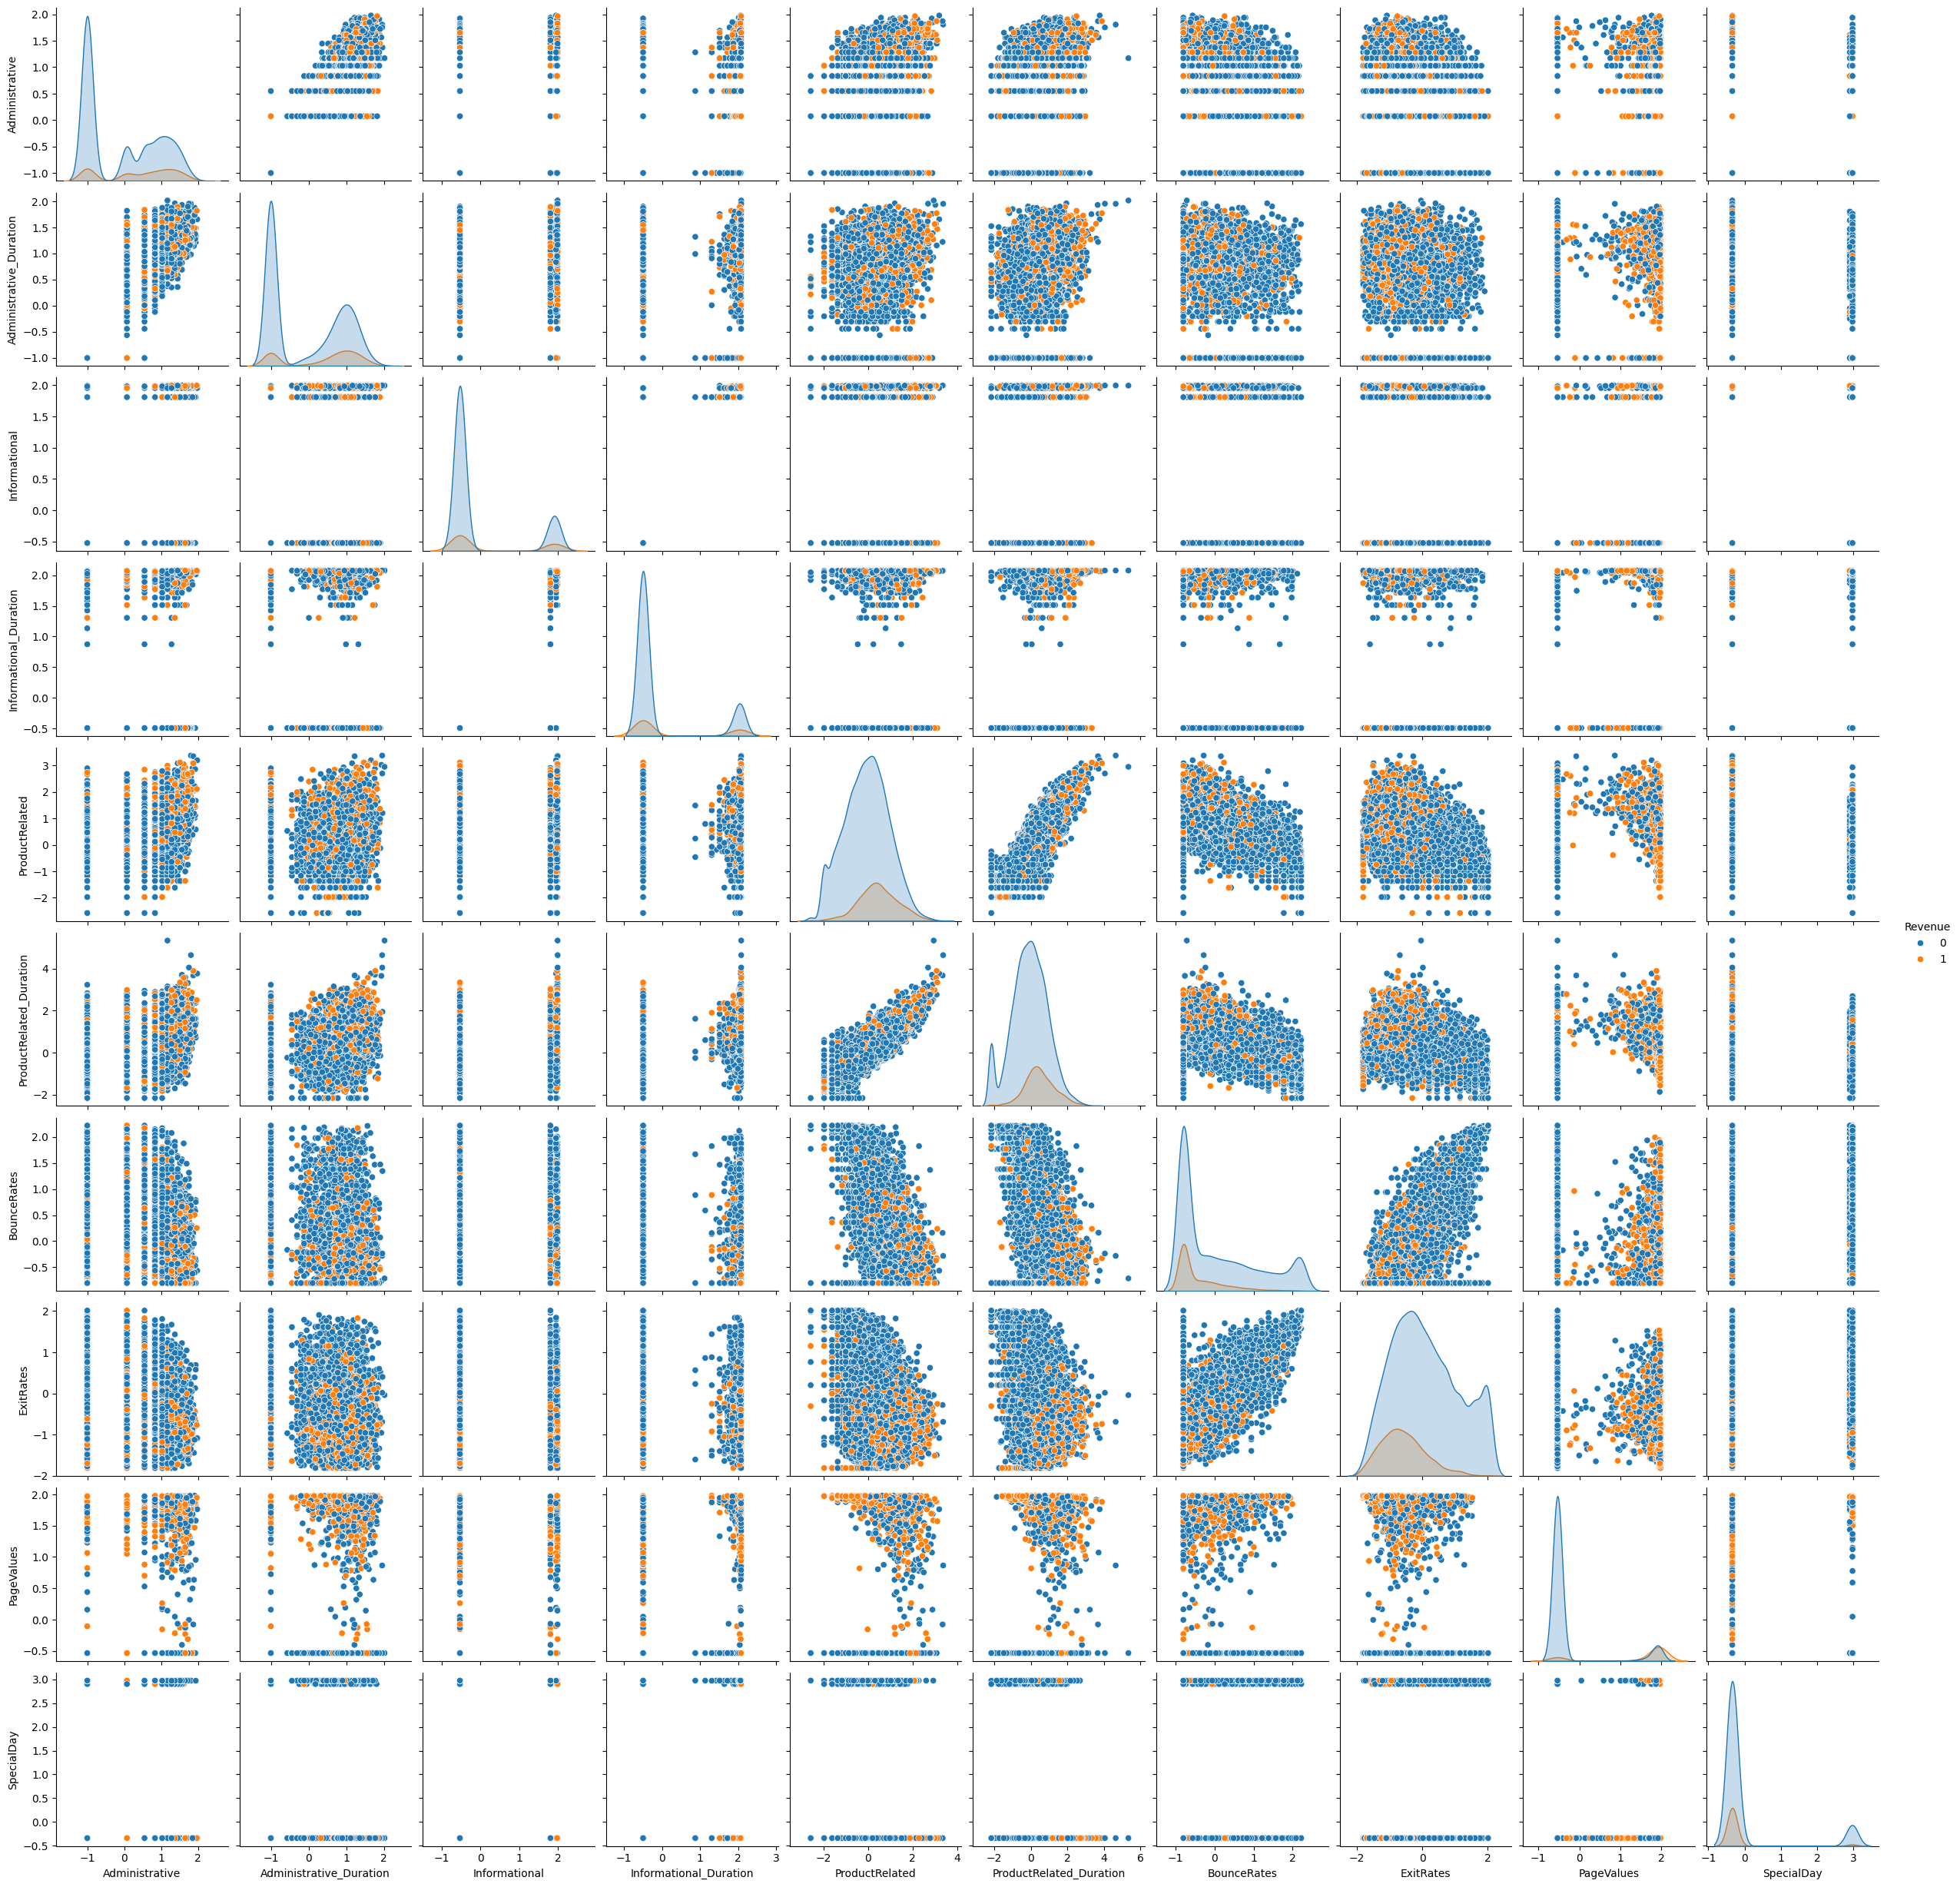

In [47]:
plt.figure(figsize = (20,20))
sns.pairplot(nums_dan_revenue, hue = 'Revenue')

pairplot ini menunjukkan hubungan antara pasangan variabel. Warna plot akan diberikan berdasarkan nilai dari kolom 'Revenue', yaitu apakah online shopers berbelanja atau tidak.

<Axes: >

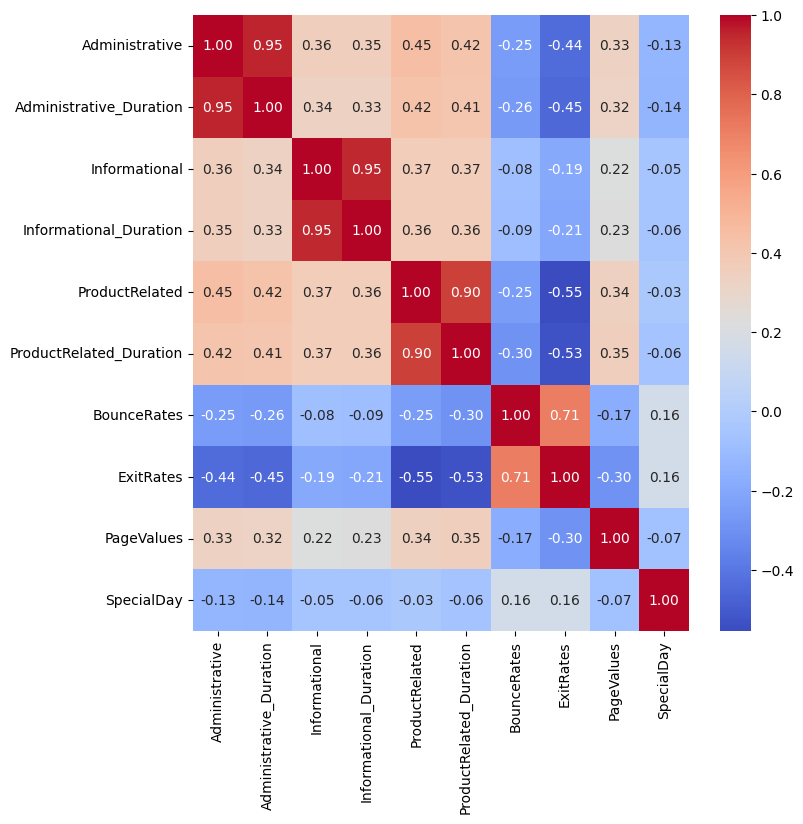

In [48]:
# analisi menggunakan heatmap
plt.figure(figsize = (8,8))
sns.heatmap(data[nums].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

* Fitur **ExitRates** dan **BounceRates** memiliki nilai multikolinieritas yang tinggi 0.9, kedua kolom ini pun berhubungan satu sama lain sehingga dapat di drop salah satunya.
* Terdapat beberapa **fitur-fitur** yang kemungkinan **redundan** karena memiliki korelasi yang cukup tinggi diantaranya **ProductRelated dengan ProductRelated_Duration, Adminisitrative dengan Adminisitrative_Duration, Informational dengan Informational_Duration**, dan begitu pula **BounceRates dengan ExitRates**. Dalam tahap data prepocessing feature-feature tersebut dapat di drop ataupun dipilih salah satu.
* Kolom PageValues ternyata memiliki korelasi tinggi dengan Revenue (0.49).
* Kolom **BounceRates** dengan beberapa kolom lain, **ExitRates** dengan beberapa kolom lain, dan page values dengan beberapa kolom lain berkumpul di bawah dan samping kiri cenderung membentuk pola logaritmik. Itu artinya, Apabila kolom **BounceRates** dan kolom **Informational_Duration** berhubungan secara logaritmik, **semakin besar nilai BounceRates, nilai Informational_Duration semakin kecil secara logaritmik**.

## 6.2 **Hubungan Antara Fitur Kategorikal**

In [49]:
tips_categorical = data[cats]
tips_categorical

Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  \
0         10                 1        1       1            1            1   
1         10                 2        2       1            2            1   
2         10                 4        1       9            3            1   
3         10                 3        2       2            4            1   
4         10                 3        3       1            4            1   
...      ...               ...      ...     ...          ...          ...   
12200      4                 4        6       1            1            1   
12201      2                 3        2       1            8            1   
12202      2                 3        2       1           13            1   
12203      2                 2        2       3           11            1   
12204      2                 3        2       1            2            0   

       Weekend  Revenue  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            1        0  
...        ...      ...  
12200        1        0  
12201        1        0  
12202        1        0  
12203        0        0  
12204        1        0  

[12205 rows x 8 columns]

Disini digunakan uji chi-kuadrat pada tabel kontingensi. Uji ini digunakan untuk menguji independensi antara dua variabel kategorikal.

In [50]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (np.sqrt(stat/(obs*mini)))

In [51]:
rows = []
for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(tips_categorical[var1], tips_categorical[var2])
        col.append(round(cramers,2))
    rows.append(col)

cramers_result = np.array(rows)
tabel_corelation_categorical = pd.DataFrame(cramers_result, columns = tips_categorical.columns, index = tips_categorical.columns)

In [52]:
tabel_corelation_categorical

Month  OperatingSystems  Browser  Region  TrafficType  \
Month              1.00              0.06     0.07    0.05         0.20   
OperatingSystems   0.06              1.00     0.59    0.11         0.19   
Browser            0.07              0.59     1.00    0.13         0.19   
Region             0.05              0.11     0.13    1.00         0.09   
TrafficType        0.20              0.19     0.19    0.09         1.00   
VisitorType        0.13              0.05     0.06    0.04         0.37   
Weekend            0.06              0.12     0.09    0.03         0.15   
Revenue            0.18              0.08     0.05    0.03         0.17   

                  VisitorType  Weekend  Revenue  
Month                    0.13     0.06     0.18  
OperatingSystems         0.05     0.12     0.08  
Browser                  0.06     0.09     0.05  
Region                   0.04     0.03     0.03  
TrafficType              0.37     0.15     0.17  
VisitorType              1.00     0.05     0.10  
Weekend                  0.05     1.00     0.03  
Revenue                  0.10     0.03     1.00

<Axes: >

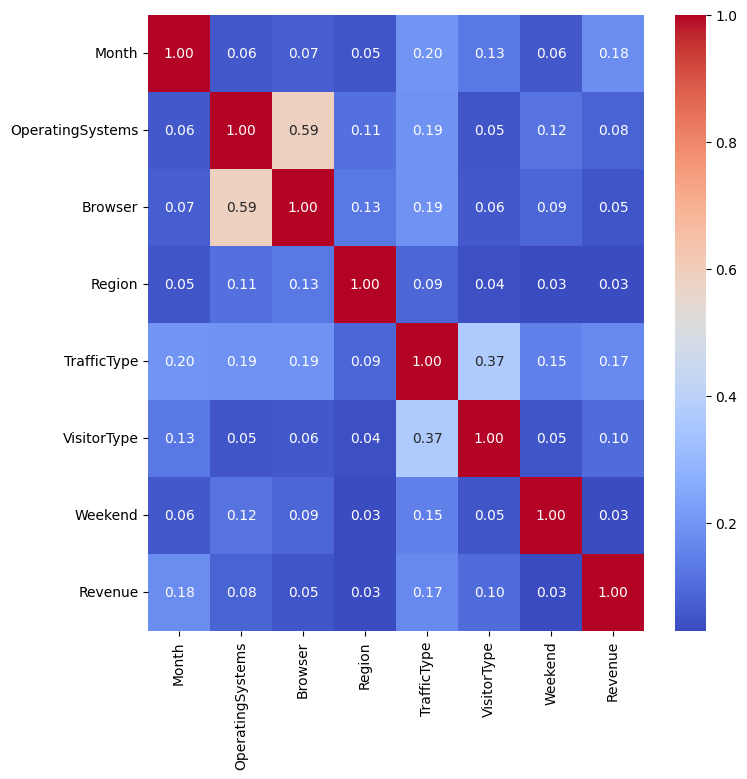

In [53]:
plt.figure(figsize = (8,8))
sns.heatmap(tabel_corelation_categorical, cmap = 'coolwarm', annot = True, fmt = '.2f')

* **Browser** dan **OperatingSystems** memiliki korelasi yang cukup tinggi.
* **Browser** dan **TrafficType** juga memiliki korelasi yang **tinggi**.
Nilai korelasi **antar kolom** dengan kolom **Revenue** cenderung **rendah**.

## **6.3 Hubungan Antara Fitur Numerikal dan Kategorikal (Semua Fitur)**

In [54]:
#Correlation Table
corr = data.corr()
corr = (corr)

corr

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.953368   
Administrative_Duration        0.953368                 1.000000   
Informational                  0.355461                 0.337789   
Informational_Duration         0.351212                 0.333898   
ProductRelated                 0.451096                 0.424037   
ProductRelated_Duration        0.418035                 0.408197   
BounceRates                   -0.251318                -0.260350   
ExitRates                     -0.442721                -0.454501   
PageValues                     0.330680                 0.320150   
SpecialDay                    -0.129561                -0.136118   
Month                          0.049568                 0.047756   
OperatingSystems              -0.014302                -0.018404   
Browser                       -0.026513                -0.027099   
Region                         0.003824                 0.011480   
TrafficType                   -0.046162                -0.043464   
VisitorType                   -0.105918                -0.131408   
Weekend                        0.037140                 0.038612   
Revenue                        0.164376                 0.164306   

                         Informational  Informational_Duration  \
Administrative                0.355461                0.351212   
Administrative_Duration       0.337789                0.333898   
Informational                 1.000000                0.948040   
Informational_Duration        0.948040                1.000000   
ProductRelated                0.367462                0.362646   
ProductRelated_Duration       0.366557                0.362997   
BounceRates                  -0.081459               -0.087024   
ExitRates                    -0.193615               -0.205529   
PageValues                    0.222367                0.226503   
SpecialDay                   -0.053737               -0.055821   
Month                        -0.009502               -0.009390   
OperatingSystems             -0.010257               -0.007991   
Browser                      -0.035245               -0.031217   
Region                       -0.020937               -0.014611   
TrafficType                  -0.036964               -0.035185   
VisitorType                   0.054042                0.047663   
Weekend                       0.041820                0.046015   
Revenue                       0.110966                0.107878   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.451096                 0.418035    -0.251318   
Administrative_Duration        0.424037                 0.408197    -0.260350   
Informational                  0.367462                 0.366557    -0.081459   
Informational_Duration         0.362646                 0.362997    -0.087024   
ProductRelated                 1.000000                 0.895450    -0.249804   
ProductRelated_Duration        0.895450                 1.000000    -0.296635   
BounceRates                   -0.249804                -0.296635     1.000000   
ExitRates                     -0.554314                -0.530111     0.709691   
PageValues                     0.343574                 0.350788    -0.173383   
SpecialDay                    -0.029287                -0.057523     0.156786   
Month                         -0.028305                -0.040666     0.002856   
OperatingSystems              -0.003352                 0.002998     0.028990   
Browser                       -0.014200                -0.007202    -0.042476   
Region                        -0.034933                -0.024104    -0.014740   
TrafficType                   -0.070197                -0.066347     0.099860   
VisitorType                    0.113655                 0.100315     0.244380   
Weekend                        0.025528                 0.021768    -0.035523   
Revenue            

In [55]:
correlation_with_revenue = data.corr()['Revenue'].sort_values(ascending=False)
print(correlation_with_revenue)

Revenue                    1.000000
PageValues                 0.611599
ProductRelated_Duration    0.211123
ProductRelated             0.196981
Administrative             0.164376
Administrative_Duration    0.164306
Informational              0.110966
Informational_Duration     0.107878
Weekend                    0.027729
Browser                    0.024052
TrafficType               -0.005618
Region                    -0.012725
OperatingSystems          -0.014927
Month                     -0.017394
SpecialDay                -0.088071
VisitorType               -0.102694
BounceRates               -0.172585
ExitRates                 -0.249863
Name: Revenue, dtype: float64


* Output ini adalah nilai korelasi antara variabel 'Revenue' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.

* Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, PageValue memiliki korelasi sebesar 0.491894 dengan 'Revenue'. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara PageValue dan Revenue (online shoppers berbelanja).

* Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya Exit Rates dan Bouce Rates memiliki hubungan negatif yang cukup kuat antara Exit Rates dan Revenue (online shoppers berbelanja).

* Korelasi Dekat dengan 0: Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'Revenue'. Dalam kasus ini, variabel 'Browser' dan 'Weekend' memiliki nilai korelasi yang cukup rendah dengan 'Revenue' (kurang dari 0.1), yang menunjukkan hubungan yang lemah dengan kemungkinan Revenue (online shoppers berbelanja).

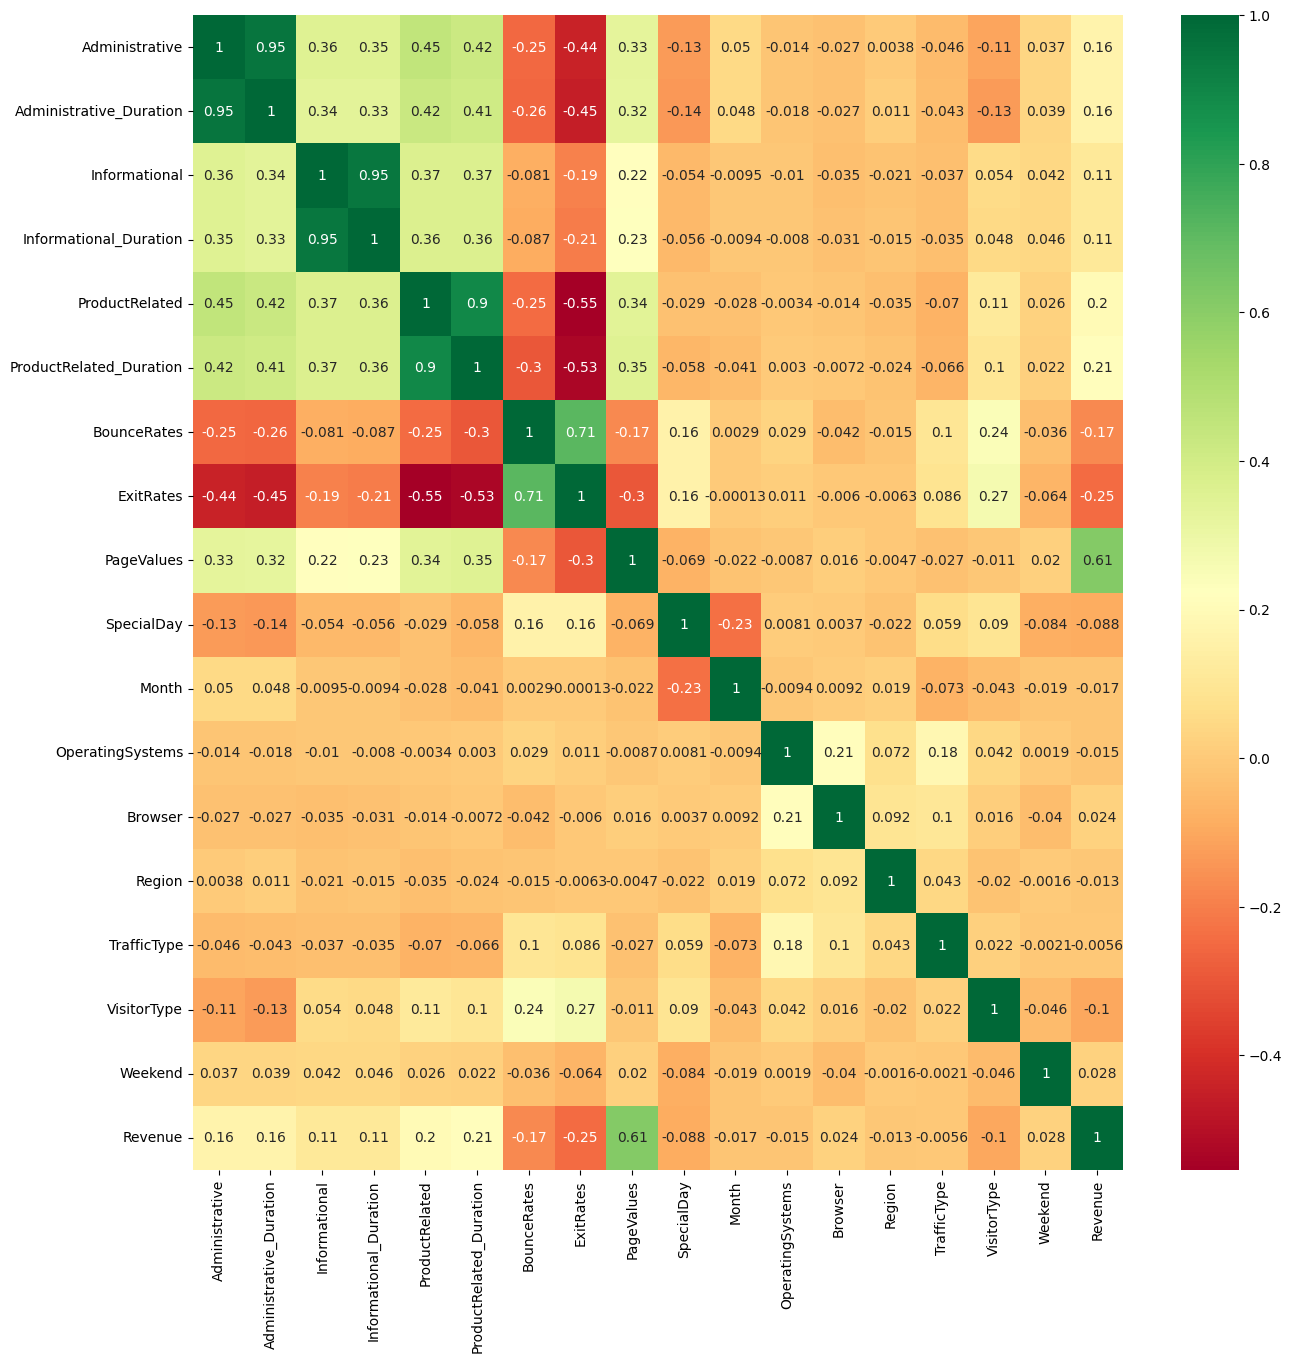

In [56]:
corrmat = data.loc[:, data.columns != 'revenue'].corr()
top_corr_features = corrmat.index

plt.figure(figsize=(15,15))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* Fitur **ExitRates** dan **BounceRates** memiliki nilai multikolinieritas yang tinggi 0.9, kedua kolom ini pun berhubungan satu sama lain sehingga dapat di drop salah satunya.
* Terdapat beberapa fitur-fitur yang **redundan** karena memiliki korelasi yang cukup tinggi diantaranya **ProductRelated** dengan **ProductRelated_Duration**, **Adminisitrative**dengan **Adminisitrative_Duration**, **Informational** dengan **Informational_Duration**, dan begitu pula **BounceRates** dengan **ExitRates**. Dalam tahap data prepocessing feature-feature tersebut dapat di drop ataupun dipilih salah satu.
* Kolom **PageValues** memiliki korelasi tinggi dengan Revenue (0.49)
* **Browser** dan **OperatingSystems** memiliki korelasi yang cukup tinggi.
* **Browser** dan **TrafficType** juga memiliki korelasi yang **tinggi**.
Nilai korelasi **antar kolom** dengan kolom **Revenue** cenderung **rendah**.

# **7. Feature Selection**

In [57]:
# memilih feature dengn korelasi tinggi dengan Revenue

x = corrmat['Revenue']
result = x[(x>0.05)|(x<-0.05)] # korelasi lebih dari 0.05 dan kuarng dari -0,05
result

Administrative             0.164376
Administrative_Duration    0.164306
Informational              0.110966
Informational_Duration     0.107878
ProductRelated             0.196981
ProductRelated_Duration    0.211123
BounceRates               -0.172585
ExitRates                 -0.249863
PageValues                 0.611599
SpecialDay                -0.088071
VisitorType               -0.102694
Revenue                    1.000000
Name: Revenue, dtype: float64

Berdasar, nilai korelasi variabel dengan label revenue, maka fitur yang dipilih adalah Administrative, Administrative_Duration, Informational, Informational_Duratiom, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, VisitorType.

Tetapi beberapa variabel diatas ada yang redundan yaitu

* Administrative, Administrative_Duration dipilih Administrative_Duration,
* Informational, Informational_Duratiom, dipilih  Informational_Duration,
* ProductRelated, ProductRelated_Duration, dipilih ProductRelated_Duration

Kemudian ada variabel yang multikolinearitas nya tinggi yaitu BounceRates, ExitRates jadi dipilih salah satu yaitu ExitRates.

In [58]:
# Menghapus kolom yang tidak dibutuhkan
shopping_clean = data.drop(['Administrative','Informational','ProductRelated','BounceRates','Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

# **8. Splitting Data**

In [59]:
X = shopping_clean.drop('Revenue', axis=1)
y = shopping_clean['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=.2)

* Disini variabel X yang akan berisi fitur-fitur dari data, kecuali kolom 'Revenue', yang akan digunakan untuk membuat prediksi.

* Kemudian variabel y berisi label dari data ini('Revenue').

* train_test_split digunakan untuk membagi data menjadi 2 bagian yaitu train (data latih) dan test (data uji).

* Digunakan random state 42.

* test_size menentukan proporsi data yang akan dialokasikan untuk set pengujian. Disini digunakan 0.2 berarti 20% dari data akan digunakan untuk pengujian, sementara 80% akan digunakan untuk pelatihan.



In [60]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=42)

* Variabel ini akan berisi data yang telah dibagi menjadi set pelatihan dan set pengujian menggunakan strategi stratifikasi. Stratifikasi disini digunakan untuk memastikan bahwa distribusi kelas pada set pelatihan dan set pengujian tetap seimbang, karena pada data ini kelas 'revenue' tidak seimbang.

* train_test_split digunakan untuk membagi data menjadi 2 bagian yaitu train (data latih) dan test (data uji).

* Digunakan random state 42.

* test_size menentukan proporsi data yang akan dialokasikan untuk set pengujian. Disini digunakan 0.2 berarti 20% dari data akan digunakan untuk pengujian, sementara 80% akan digunakan untuk pelatihan.


In [61]:
scaler = StandardScaler()
X_train_stratified = scaler.fit_transform(X_train_stratified)
X_test_stratified = scaler.transform(X_test_stratified)

fungsi StandarScaler untuk melakukan normalisasi (scaling) pada data. Normalisasi adalah proses mengubah fitur-fitur data sehingga memiliki rata-rata 0 dan standar deviasi 1.

# **9. Model Development**

BeberapaModel machine learning yang akan digunakan yaitu algoritma Decision Tree, Gradient Boosting Machines (GBM), Random Forest dan XgBoost.

## **9.1 Decision Tree**

Decision Tree (Pohon Keputusan) merupakan salah satu cara data processing dalam memprediksi masa depan dengan cara membangun klasifikasi atau regresi model dalam bentuk struktur pohon. Hal tersebut dilakukan dengan cara memecah terus ke dalam himpunan bagian yang lebih kecil lalu pada saat itu juga sebuah pohon keputusan secara bertahap dikembangkan. Hasil akhir dari proses tersebut adalah pohon dengan node keputusan dan node daun.

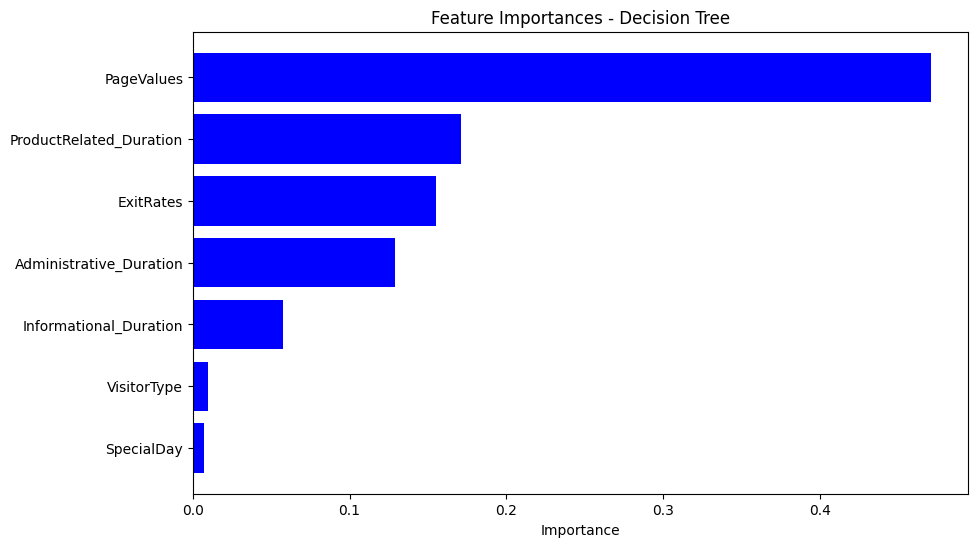

In [62]:
# Inisialisasi dan Melatih Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_stratified, y_train_stratified)

# Mendapatkan Feature Importances
importances_dt = dt_model.feature_importances_
features_dt = pd.DataFrame({'Feature': X.columns, 'Importance': importances_dt})
features_dt = features_dt.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importances - Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(features_dt['Feature'], features_dt['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## **9.2 Random Forest**

Random Forest adalah algoritma supervised learning yang digunakan untuk klasifikasi dan regresi. Ini termasuk dalam kategori ensemble learning, di mana sekelompok model (dalam hal ini, decision trees) bekerja bersama untuk meningkatkan akurasi prediksi. Setiap model dalam Random Forest dilatih pada subset acak dari data dan fitur, lalu hasil prediksi dari semua model digabungkan untuk menghasilkan prediksi akhir.

Random Forest menggunakan teknik bagging (bootstrap aggregating) yang melibatkan pelatihan beberapa decision trees pada sampel data yang berbeda untuk mengurangi overfitting dan meningkatkan stabilitas model.

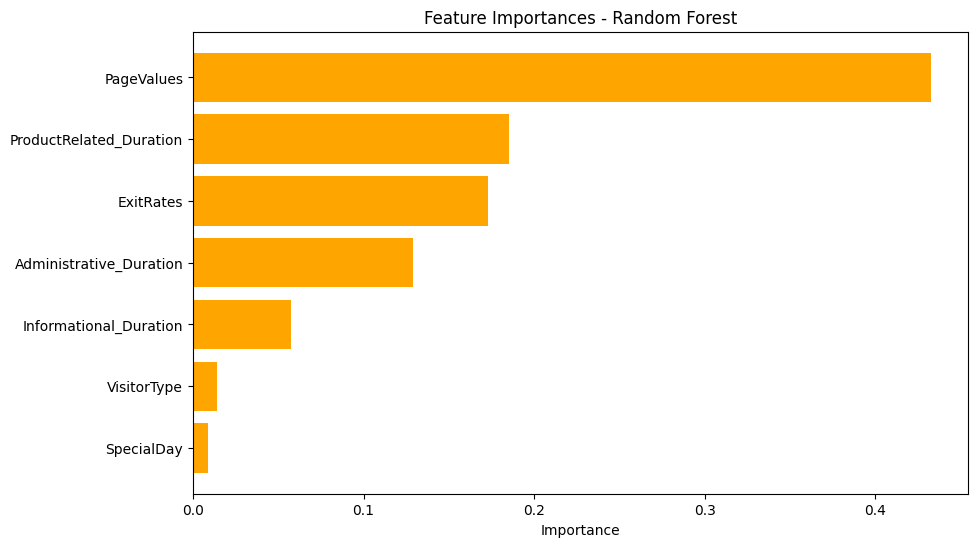

In [83]:
# Inisialisasi dan Melatih Model Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_stratified, y_train_stratified)

# Mendapatkan Feature Importances
importances_rfc = rfc.feature_importances_
features_rfc = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rfc})
features_rfc = features_rfc.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importances - Random Forest
plt.figure(figsize=(10, 6))
plt.barh(features_rfc['Feature'], features_rfc['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

## **9.3 Gradient Boosting Machines**

Gradient Boosting Machine (GBM) adalah metode ensemble learning yang menggabungkan beberapa model sederhana untuk meningkatkan performa prediksi. GBM bekerja dengan cara membangun model secara bertahap, di mana setiap model baru memperbaiki kesalahan prediksi model sebelumnya. Pada setiap iterasi, model baru ditambahkan untuk memperbaiki hasil prediksi, sehingga secara bertahap meningkatkan akurasi model secara keseluruhan. Pendekatan GBM bersifat "greedy" karena terus menyesuaikan prediksi hingga mencapai performa optimal.

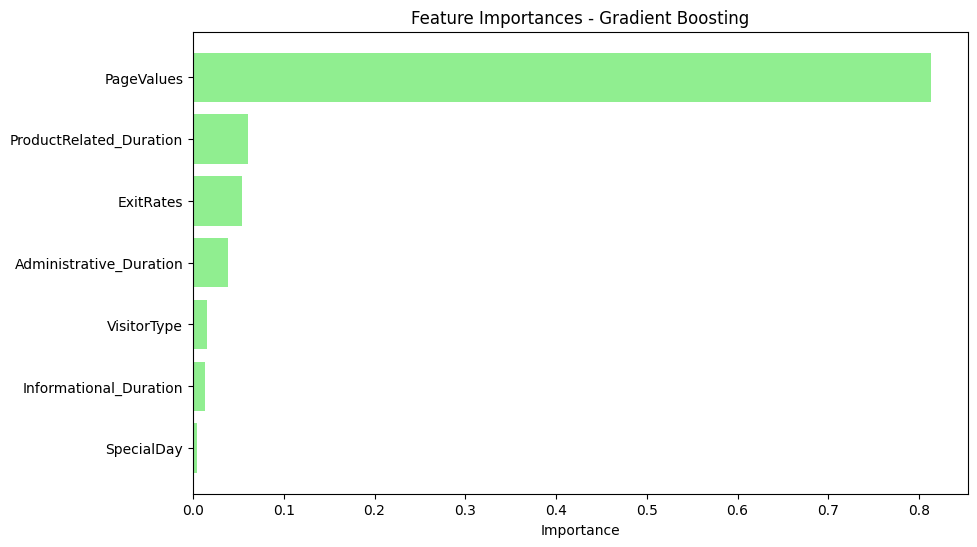

In [82]:
# Inisialisasi dan Melatih Model GBM
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_stratified, y_train_stratified)

# Mendapatkan Feature Importances
importances_gbm = gbm_model.feature_importances_
features_gbm = pd.DataFrame({'Feature': X.columns, 'Importance': importances_gbm})
features_gbm = features_gbm.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importances - GBM
plt.figure(figsize=(10, 6))
plt.barh(features_gbm['Feature'], features_gbm['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

## **9.4 XGBoost (Extreme Gradient Boosting)**

XGBoost (Extreme Gradient Boosting) adalah algoritma supervised learning yang sangat efektif dan populer untuk tugas klasifikasi dan regresi. XGBoost merupakan implementasi dari teknik gradient boosting yang mengoptimalkan dan mempercepat proses boosting model.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:59:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


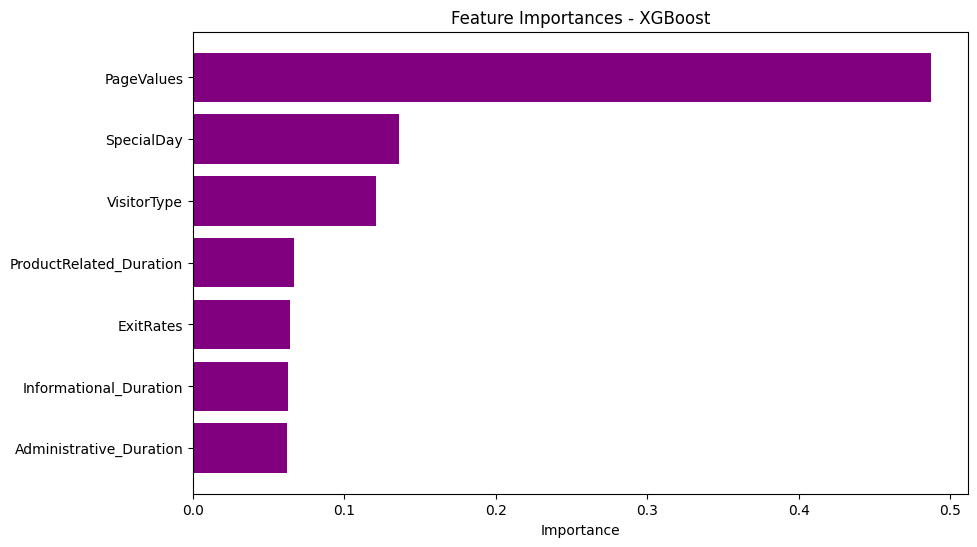

In [65]:
# Inisialisasi dan Melatih Model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_stratified, y_train_stratified)

# Mendapatkan Feature Importances
importances_xgb = xgb_model.feature_importances_
features_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb})
features_xgb = features_xgb.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importances - XGBoost
plt.figure(figsize=(10, 6))
plt.barh(features_xgb['Feature'], features_xgb['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.show()


## **9.5 Perbandingan Feature Important**

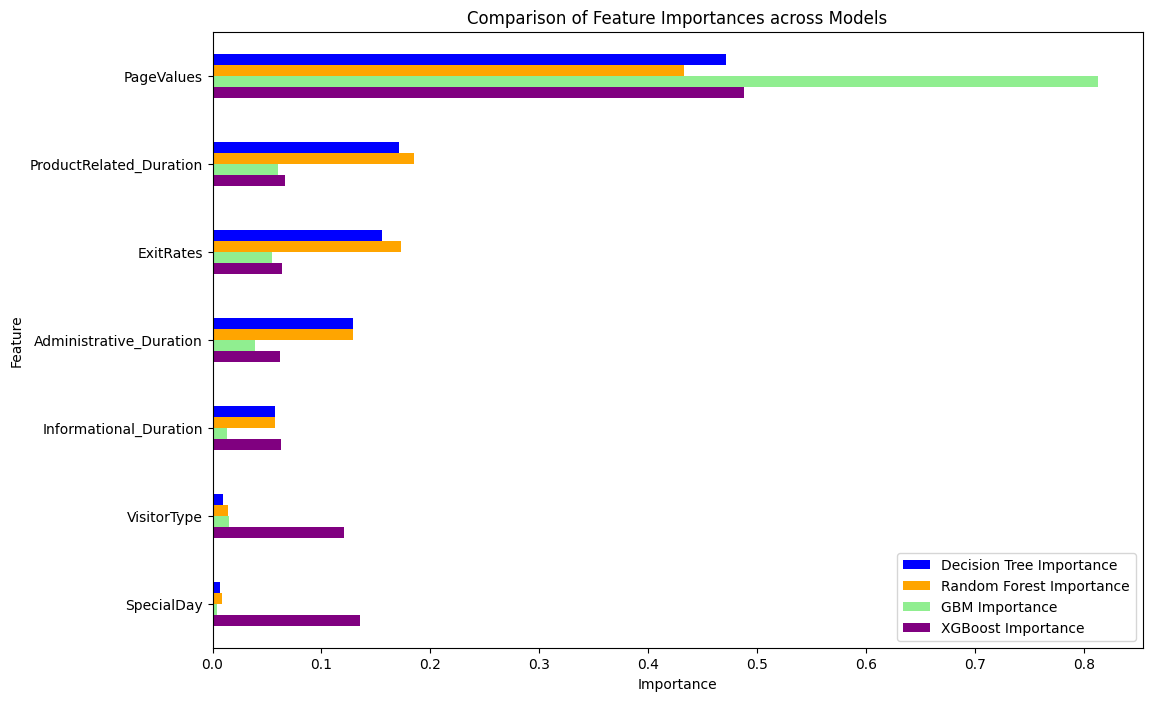

In [81]:
# Visualisasi Perbandingan Feature Importances
comparison_df.plot(kind='barh', x='Feature', figsize=(12, 8), color=['blue', 'orange', 'lightgreen', 'purple'])
plt.xlabel('Importance')
plt.title('Comparison of Feature Importances across Models')
plt.gca().invert_yaxis() # Membalik sumbu Y agar fitur terpenting di atas
plt.show()

Terlihat 3 fitur teratas yang paling mempengaruhi revenue dari pelanggan yaitu **PageValues, ProductRelated_Duration, dan ExitRates**

* PageValues: Fitur ini sangat penting karena mencerminkan nilai rata-rata halaman yang dikunjungi oleh pelanggan. Semakin tinggi nilai ini, semakin besar kemungkinan pelanggan akan melakukan pembelian (revenue). Hal ini karena PageValues menunjukkan kontribusi halaman tertentu terhadap transaksi.

* ProductRelated_Duration: Durasi yang dihabiskan oleh pengguna pada halaman-halaman terkait produk. Semakin lama seorang pelanggan menghabiskan waktu untuk melihat produk, semakin besar kemungkinan mereka tertarik untuk membeli, yang akhirnya berdampak positif terhadap revenue.

* ExitRates: Persentase pengunjung yang meninggalkan situs dari halaman tertentu. ExitRates yang lebih tinggi bisa menjadi indikator negatif, di mana pelanggan cenderung meninggalkan situs tanpa melakukan pembelian. Namun, ExitRates yang lebih rendah pada halaman penting menunjukkan potensi yang lebih besar untuk menghasilkan revenue.

# **10. Evaluasi**

Beberapa Evaluasi model yang digunakan yaitu menggunakan:
* ROC AUC (Receiver Operating Characteristic Area Under the Curve): Nilai ini menunjukkan seberapa baik model dapat membedakan antara kelas positif dan negatif. Semakin mendekati 1, semakin baik model.
Visualisasi ROC Curve: Membandingkan dua model dalam hal trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR).

* Confusion Matrix:
   * True Positives (TP): Kasus positif yang benar-benar diprediksi sebagai positif.
   * False Positives (FP): Kasus negatif yang salah diprediksi sebagai positif.
   * True Negatives (TN): Kasus negatif yang benar-benar diprediksi sebagai negatif.
   * False Negatives (FN): Kasus positif yang salah diprediksi sebagai negatif.

* Classification Report:
  * Akurasi : mengukur sejauh mana model berhasil memprediksi dengan benar secara keseluruhan. TP+TN/(TP+TN+FP+FN).
  * Presisi : mengukur seberapa akurat model dalam memprediksi kelas positif. TP/(TP+FP).
  * Recall : mengukur sejauh mana model klasifikasi dapat mengidentifikasi semua kasus positif yang sebenarnya. TP/(TP+FP)
  * F1 Score : Perbandingan Presisi dan Recall.

## **10.1 Evaluasi Agoritma Decision Tree**

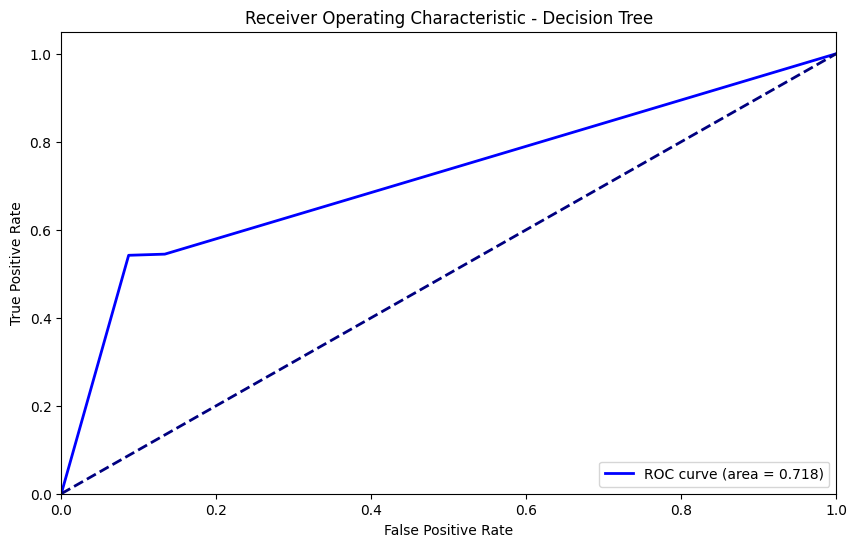

In [66]:
# Evaluasi Model - Decision Tree
y_pred_proba_dt = dt_model.predict_proba(X_test_stratified)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_stratified, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC Curve - Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.show()

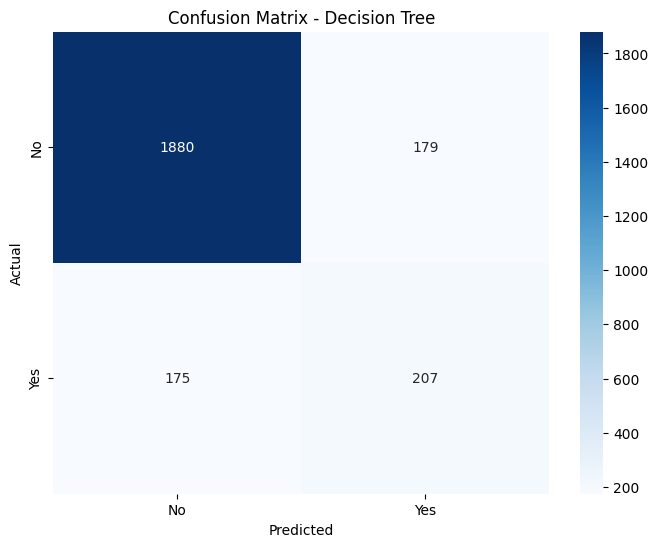

In [67]:
# Confusion Matrix - Decision Tree
conf_matrix_dt = confusion_matrix(y_test_stratified, dt_model.predict(X_test_stratified))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [68]:
# Classification Report - Decision Tree
print("Classification Report - Decision Tree:")
print(classification_report(y_test_stratified, dt_model.predict(X_test_stratified), digits=3))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0      0.915     0.913     0.914      2059
           1      0.536     0.542     0.539       382

    accuracy                          0.855      2441
   macro avg      0.726     0.727     0.727      2441
weighted avg      0.856     0.855     0.855      2441



## **10.2 Evaluasi Algoritma Random Forest**

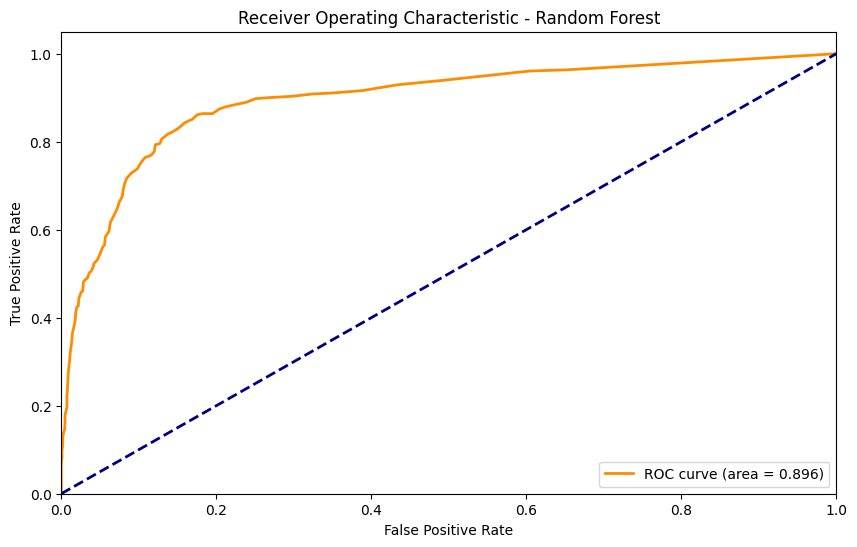

In [69]:
# Evaluasi Model - Random Forest
y_pred_proba_rfc = rfc.predict_proba(X_test_stratified)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test_stratified, y_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# ROC Curve - Random Forest
plt.figure(figsize=(10, 6))
plt.plot(fpr_rfc, tpr_rfc, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

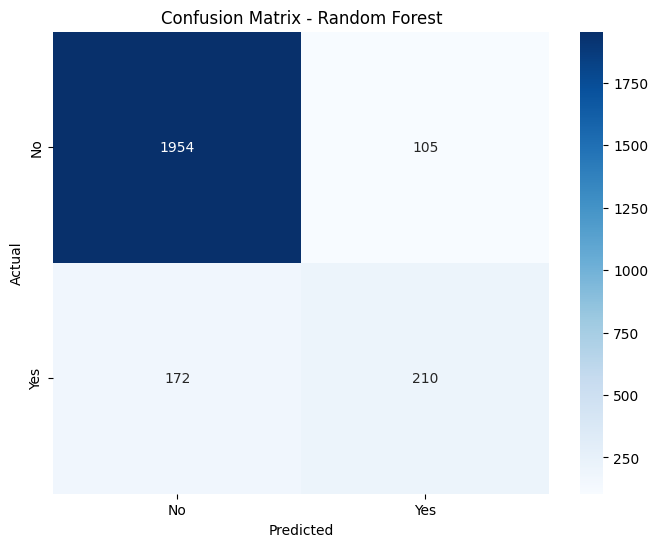

In [70]:
# Confusion Matrix - Random Forest
conf_matrix_rfc = confusion_matrix(y_test_stratified, rfc.predict(X_test_stratified))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [71]:
# Classification Report - Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test_stratified, rfc.predict(X_test_stratified), digits=3))

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0      0.919     0.949     0.934      2059
           1      0.667     0.550     0.603       382

    accuracy                          0.887      2441
   macro avg      0.793     0.749     0.768      2441
weighted avg      0.880     0.887     0.882      2441



## **10.3 Evaluasi Algoritma Gradient Boosting Machine (GBM)**

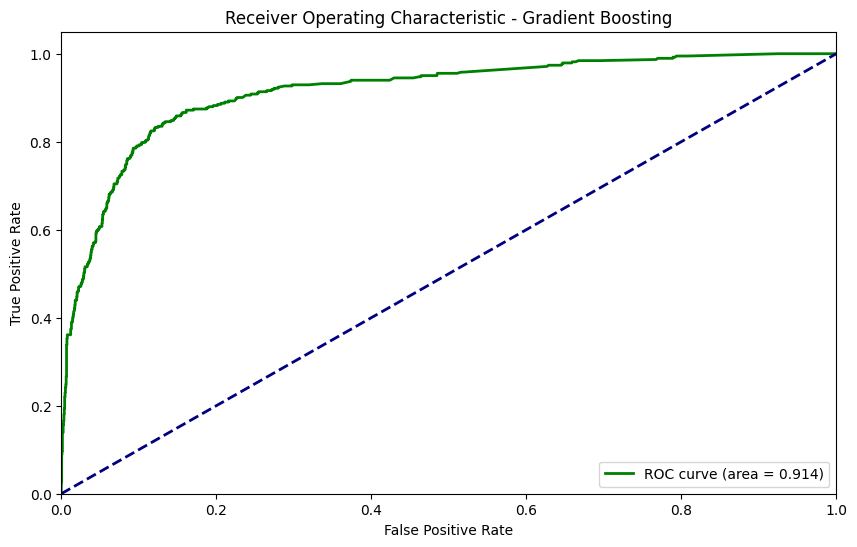

In [72]:
# Evaluasi Model - GBM
y_pred_proba_gbm = gbm_model.predict_proba(X_test_stratified)[:, 1]
fpr_gbm, tpr_gbm, _ = roc_curve(y_test_stratified, y_pred_proba_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# ROC Curve - GBM
plt.figure(figsize=(10, 6))
plt.plot(fpr_gbm, tpr_gbm, color='green', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

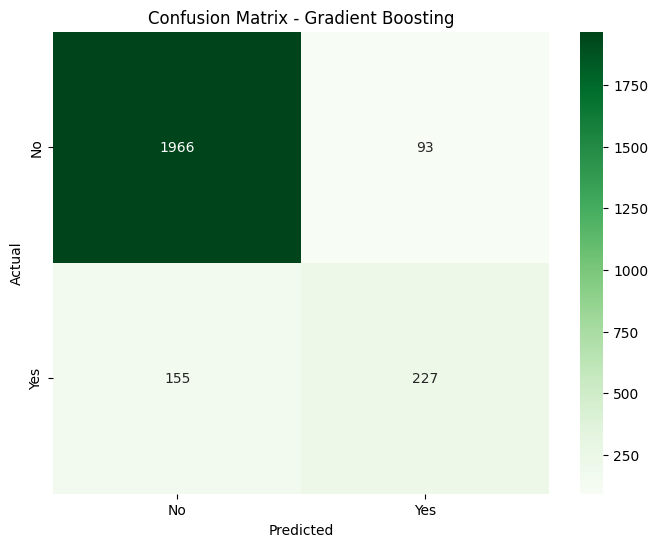

In [73]:
# Confusion Matrix - GBM
conf_matrix_gbm = confusion_matrix(y_test_stratified, gbm_model.predict(X_test_stratified))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [74]:
# Classification Report - GBM
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test_stratified, gbm_model.predict(X_test_stratified), digits=3))

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0      0.927     0.955     0.941      2059
           1      0.709     0.594     0.647       382

    accuracy                          0.898      2441
   macro avg      0.818     0.775     0.794      2441
weighted avg      0.893     0.898     0.895      2441



##  **10.4 Evaluasi Algoritma XgBoosting**

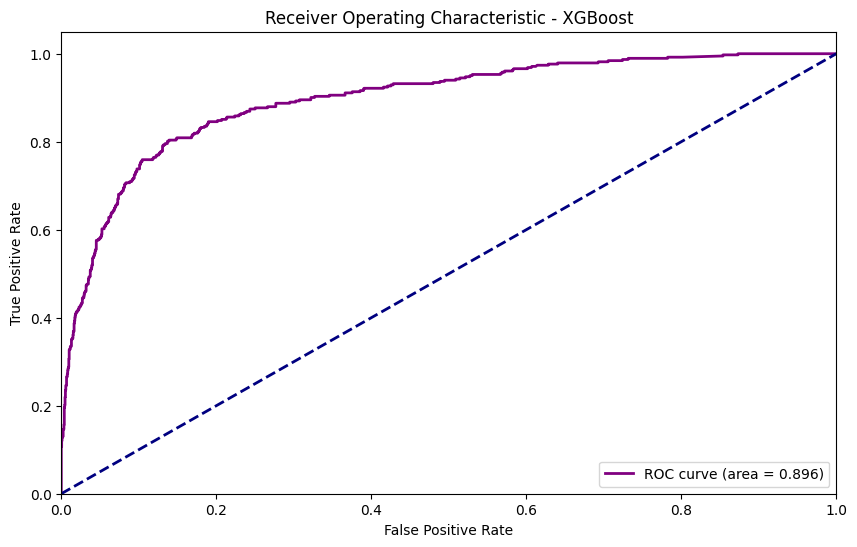

In [75]:
# Evaluasi Model - XGBoost
y_pred_proba_xgb = xgb_model.predict_proba(X_test_stratified)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_stratified, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ROC Curve - XGBoost
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.show()

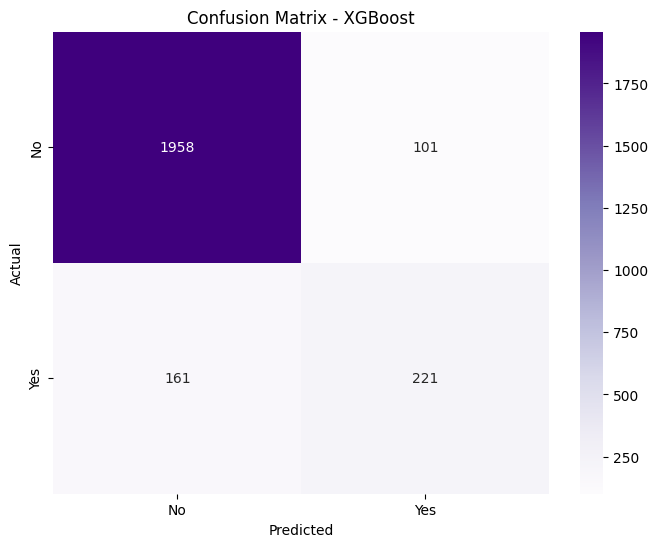

In [76]:
# Confusion Matrix - XGBoost
conf_matrix_xgb = confusion_matrix(y_test_stratified, xgb_model.predict(X_test_stratified))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [77]:
# Classification Report - XGBoost
print("Classification Report - XGBoost:")
print(classification_report(y_test_stratified, xgb_model.predict(X_test_stratified), digits=3))

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0      0.924     0.951     0.937      2059
           1      0.686     0.579     0.628       382

    accuracy                          0.893      2441
   macro avg      0.805     0.765     0.783      2441
weighted avg      0.887     0.893     0.889      2441



## **10.5 Perbandingan ROC AUC CURVE**

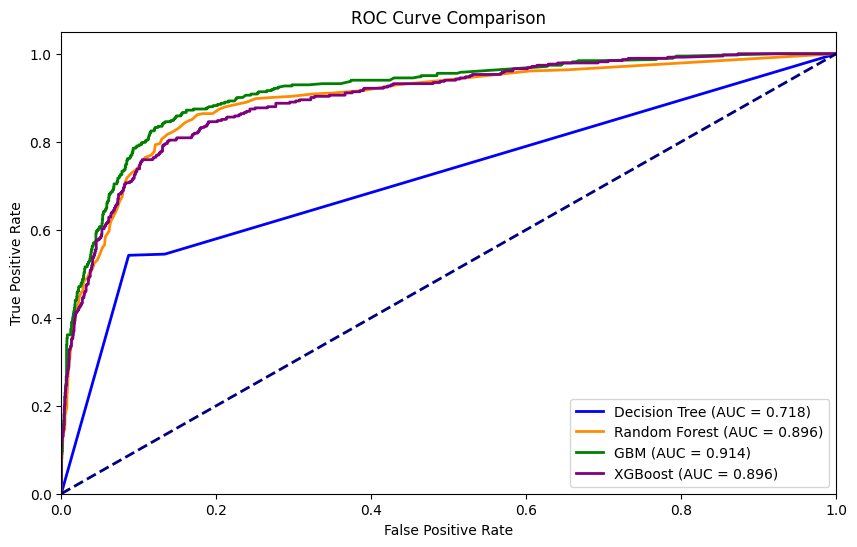

In [84]:
# Plot ROC Curve Comparison
plt.figure(figsize=(10, 6))

# ROC Curve - Decision Tree
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.3f)' % roc_auc_dt)

# ROC Curve - Random Forest
plt.plot(fpr_rfc, tpr_rfc, color='darkorange', lw=2, label='Random Forest (AUC = %0.3f)' % roc_auc_rfc)

# ROC Curve - Gradient Boosting
plt.plot(fpr_gbm, tpr_gbm, color='green', lw=2, label='GBM (AUC = %0.3f)' % roc_auc_gbm)

# ROC Curve - XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.3f)' % roc_auc_xgb)

# Baseline (diagonal line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


Berdasarkan ROC AUC Curve dimana semakin mendekati nilai 1, maka model semakin baik terlihat bahwa Gradient Boosting Machines adalah algoritma yang paling baik dalam membedakan antara kelas True Positive dan Fale Positive dengan nilai 0,914.

## **10.6 Perbandingan Confussion Matrix**

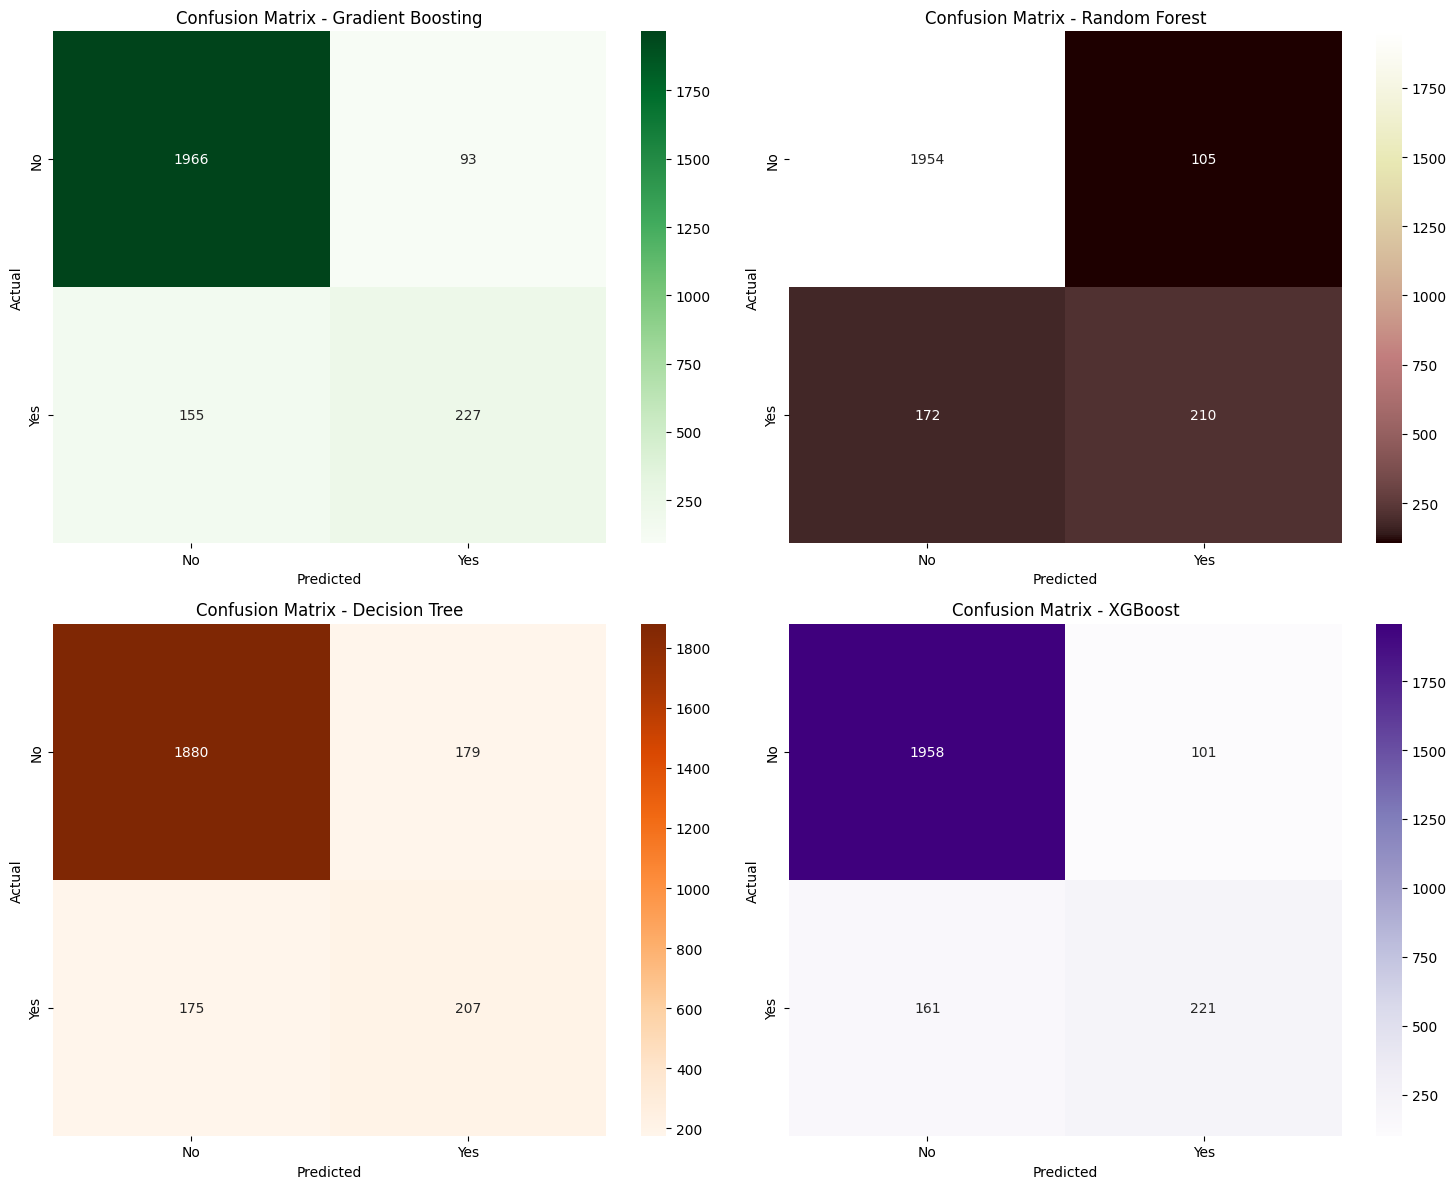

In [87]:
# Initialize the figure
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix - Decision Tree
conf_matrix_dt = confusion_matrix(y_test_stratified, dt_model.predict(X_test_stratified))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix - Decision Tree')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Actual')

# Confusion Matrix - Random Forest
conf_matrix_rfc = confusion_matrix(y_test_stratified, rfc.predict(X_test_stratified))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='pink', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[0, 1])
axs[0, 1].set_title('Confusion Matrix - Random Forest')
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('Actual')

# Confusion Matrix - Gradient Boosting
conf_matrix_gbm = confusion_matrix(y_test_stratified, gbm_model.predict(X_test_stratified))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[0, 0])
axs[0, 0].set_title('Confusion Matrix - Gradient Boosting')
axs[0, 0].set_xlabel('Predicted')
axs[0, 0].set_ylabel('Actual')

# Confusion Matrix - XGBoost
conf_matrix_xgb = confusion_matrix(y_test_stratified, xgb_model.predict(X_test_stratified))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[1, 1])
axs[1, 1].set_title('Confusion Matrix - XGBoost')
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('Actual')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


* Model Gradient Boosting terlihat cukup efektif dalam hal False Positive, dengan hanya 93 prediksi salah. Model ini juga memiliki jumlah True Positive yang tinggi (227) dibanding beberapa model lain, menunjukkan  keseimbangan yang baik dalam mendeteksi kedua kelas.

* Random Forest sedikit kurang akurat dibanding Gradient Boosting, dengan lebih banyak False Positives dan False Negatives. Namun, secara umum, model ini masih cukup kuat dalam memprediksi True Negatives dan True Positives dengan performa yang seimbang.

* Decision Tree menghasilkan lebih banyak False Positives (179) dibandingkan dengan Gradient Boosting dan Random Forest, yang menunjukkan bahwa model ini mungkin terlalu sering memprediksi kelas Positive. Ini mungkin membuat model kurang baik dalam mengidentifikasi kelas negatif yang benar.

* XGBoost menunjukkan performa yang mirip dengan Gradient Boosting,tapi lebih bagus performa dadari xgboost dalam prediksi kelasnya.


## **10.7 Perbandingan Classification Report**

In [88]:
# Classification Report - Decision Tree
print("Classification Report - Decision Tree:")
print(classification_report(y_test_stratified, dt_model.predict(X_test_stratified), digits=3))

# Classification Report - Random Forest
print("\nClassification Report - Random Forest:")
print(classification_report(y_test_stratified, rfc.predict(X_test_stratified), digits=3))

# Classification Report - Gradient Boosting
print("\nClassification Report - Gradient Boosting:")
print(classification_report(y_test_stratified, gbm_model.predict(X_test_stratified), digits=3))

# Classification Report - XGBoost
print("\nClassification Report - XGBoost:")
print(classification_report(y_test_stratified, xgb_model.predict(X_test_stratified), digits=3))


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0      0.915     0.913     0.914      2059
           1      0.536     0.542     0.539       382

    accuracy                          0.855      2441
   macro avg      0.726     0.727     0.727      2441
weighted avg      0.856     0.855     0.855      2441


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0      0.919     0.949     0.934      2059
           1      0.667     0.550     0.603       382

    accuracy                          0.887      2441
   macro avg      0.793     0.749     0.768      2441
weighted avg      0.880     0.887     0.882      2441


Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0      0.927     0.955     0.941      2059
           1      0.709     0.594     0.647       382

    accuracy                          0.898      2441
   ma

* Decision Tree memiliki akurasi yang cukup baik (85.5%), namun performa untuk kelas 1 (dengan precision 53,6% dan recall 54,2%) menunjukkan bahwa model ini kesulitan mengidentifikasi kasus positif (kelas 1). F1-Score yang rendah untuk kelas 1 juga menunjukkan ketidakseimbangan dalam prediksi.

* Random Forest memberikan peningkatan akurasi (88.7%) dibandingkan Decision Tree. Precision dan F1-Score untuk kelas 1 meningkat signifikan (precision 66,7% dan F1-Score 60,3%), menunjukkan bahwa model ini lebih baik dalam mengidentifikasi kasus positif (kelas 1). Namun, recall untuk kelas 1 (55%) masih rendah, artinya model ini tidak dapat mendeteksi semua kasus positif.

* Gradient Boosting memberikan hasil terbaik dari segi accuracy (89.8%) dan precision untuk kelas 1 (70,9%). Namun, recall untuk kelas 1 masih lebih rendah (59,4%), meskipun sedikit lebih baik daripada Random Forest. F1-Score untuk kelas 1 juga meningkat menjadi 64,7%, menunjukkan kemampuan model yang lebih baik dalam mengidentifikasi kasus positif secara keseluruhan.

* XGBoost menunjukkan performa yang mendekati Gradient Boosting, dengan accuracy yang tinggi (89.3%). Precision untuk kelas 1 (68,6%) dan recall (57,9%) masih lebih baik dibandingkan Random Forest, tetapi sedikit lebih rendah dibandingkan Gradient Boosting. Namun, secara keseluruhan model ini juga memberikan keseimbangan yang cukup baik dalam memprediksi kedua kelas.

# **INTERPRETASI**

**KESIMPULAN**

**Berdasarkan analisis dan model machine learning 3 fitur yang paling berpengaruh dalam menghasilkan Revenue oleh Pelanggan yaitu PageValues, ProductRelated_Duration, dan ExitRates**

**Kemudan Algoritma Machine Learning terbaik untuk memprediksi revenue oleh pelanggan yaitu Gradien Boosting Machines (GBM) dengan nilai ROC AUC: 0,914 ini berarti model sangat baik dalam membedakan kelas positif dan negatif. Akurasi dari GBM paling tinggi dari model lainyya yaitu 89,8%.**